## **Problem Statement**

The aim of this case study is to identify the risky loan applicants, thereby cutting down the amount of credit loss.
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [0]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#Importing the csv data in the form of pandas DataFrame
loanData=pd.read_csv("loan.csv", low_memory=False)
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [0]:
#Checking the first 10 rows on the data and the shape of the data
print("Shape of the DataFrame is: ",loanData.shape)
print("\n")
print("First 10 rows of the data are : ",'\n')
loanData.head(10)

Shape of the DataFrame is:  (39717, 111)


First 10 rows of the data are :  



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Removing Columns with all null values and ids

In [0]:
#Checking the columns with nulls and extracting columns which only have nulls

loanData_nulls=loanData.isnull().sum()
loanData_all_nulls=loanData_nulls[loanData_nulls==len(loanData)]
len_loanData_nulls=len(loanData_nulls)
len_loanData_all_nulls=len(loanData_nulls[loanData_nulls==len(loanData)])

print("Total columns with nulls : ",len_loanData_nulls)
print("Total columns with all nulls : ",len_loanData_all_nulls)


Total columns with nulls :  111
Total columns with all nulls :  54


In [0]:
#Dropping the columns with all nulls and id columns
non_null_columns=list(set(loanData.columns) - set(loanData_all_nulls.index))
loanData=loanData[non_null_columns]

id_columns=list(["id","member_id"])
loanData=loanData.drop(id_columns,axis=1)

In [0]:
#Re-checking the data info
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   out_prncp                   39717 non-null  float64
 1   home_ownership              39717 non-null  object 
 2   desc                        26775 non-null  object 
 3   total_pymnt_inv             39717 non-null  float64
 4   pymnt_plan                  39717 non-null  object 
 5   mths_since_last_delinq      14035 non-null  float64
 6   revol_bal                   39717 non-null  int64  
 7   inq_last_6mths              39717 non-null  int64  
 8   loan_amnt                   39717 non-null  int64  
 9   last_pymnt_d                39646 non-null  object 
 10  initial_list_status         39717 non-null  object 
 11  loan_status                 39717 non-null  object 
 12  delinq_2yrs                 39717 non-null  int64  
 13  chargeoff_within_12_mths    396

### Handling Missing Values
- Removing columns with 90%+ null values
- Filling remaining nulls with values that make more business sense
- Converting some columns from 'object' to 'numeric' for better analysis

In [0]:
# Checking columns which have some null values in them
loanData.isnull().sum()[loanData.isnull().sum()>0]

desc                          12942
mths_since_last_delinq        25682
last_pymnt_d                     71
chargeoff_within_12_mths         56
mths_since_last_record        36931
pub_rec_bankruptcies            697
next_pymnt_d                  38577
title                            11
collections_12_mths_ex_med       56
revol_util                       50
last_credit_pull_d                2
emp_length                     1075
tax_liens                        39
emp_title                      2459
dtype: int64

In [0]:
# "next_pymnt_d"(Next scheduled payment date): Removing it as it has 95pc nulls and is not of much significance
loanData = loanData.drop("next_pymnt_d", axis=1)

# "mths_since_last_record"(The number of months since the last public record) : Removing it as it has 90pc nulls and is not of much significance
loanData = loanData.drop("mths_since_last_record", axis=1)


In [0]:
#collections_12_mths_ex_med(Number of collections in 12 months excluding medical collections) : Checking the data distribution
print(loanData['collections_12_mths_ex_med'].value_counts())

#removing it as it has only zeros
loanData=loanData.drop("collections_12_mths_ex_med", axis=1)

collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64


In [0]:
#mths_since_last_delinq(The number of months since the borrower's last delinquency) : Checking the data distribution
print(loanData['mths_since_last_delinq'].value_counts())

#replacing nulls with zeros as zero as that would indicate no known last delinquency of the borrower
loanData["mths_since_last_delinq"] = loanData["mths_since_last_delinq"].fillna(0)

mths_since_last_delinq
0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: count, Length: 95, dtype: int64


In [0]:
#emp_length(Employment Lenth) : Checking the data distribution
print(loanData['emp_length'].value_counts())

#filling nulls with 0 years as that would indicate no employment. Such people may be small business owner or people haveing rental income etc.
loanData['emp_length'] = loanData['emp_length'].fillna('0 years')


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [0]:
#tax_liens(Number of tax liens) : Checking the data distribution
print(loanData["tax_liens"].value_counts())

#Removing "tax_liens" as it has only one value (0)
loanData=loanData.drop("tax_liens",axis=1)

tax_liens
0.0    39678
Name: count, dtype: int64


In [0]:
#revol_util (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit) : Checking the data distribution
print(loanData["revol_util"].value_counts())

#filling nulls with 0% as that would mean no utilization and is making some business sense
loanData["revol_util"]=loanData["revol_util"].fillna("0%")

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64


In [0]:
#desc,emp_title,title,zip_code,url,addr_state : These columns can be removed as they do not hold much significance in the analysis and are only some descriptions of the borrower
loanData=loanData.drop(["desc","emp_title","title","zip_code","url"],axis=1)

In [0]:
#chargeoff_within_12_mths(Number of charge-offs within 12 months) : Checking data distribution
print(loanData['chargeoff_within_12_mths'].value_counts())

#removing it as it has only one value (0)
loanData=loanData.drop("chargeoff_within_12_mths",axis=1)

chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64


In [0]:
#pub_rec_bankruptcies(Number of public record bankruptcies) : Checking data distribution
print(loanData['pub_rec_bankruptcies'].value_counts())

#filling nulls with 0 as that would mean no publically recorded bankruptcies.
loanData['pub_rec_bankruptcies']=loanData['pub_rec_bankruptcies'].fillna(0)

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


In [0]:
# Removing Single Value Columns
# pymnt_plan -- All values are 'n'
# policy_code -- All values are 1
# initial_list_status -- All values are 'f'
# application_type -- All values are 'INDIVIDUAL'
loanData=loanData.drop(["pymnt_plan","initial_list_status","application_type","policy_code"],axis=1)

In [0]:
# emp_length(employment length) : Making it numeric for better analysis. Converting "10+"" to 11 to distinguish then from 10 years. Converting "< 1" year to 0.5 to distinguish then from others.

loanData["emp_length"].value_counts()

loanData["emp_length"]=loanData["emp_length"].apply(lambda x: x[:-5])
loanData["emp_length"]=loanData["emp_length"].apply(lambda x: 0.5 if x=="< 1" else x)
loanData["emp_length"]=loanData["emp_length"].apply(lambda x: 11 if x=="10+ " else x)
loanData["emp_length"]=loanData["emp_length"].astype(int)

In [0]:
# int_rate(rate Of Interest of the loan) : Making it numeric for better analysis and removing '%' sign
loanData["int_rate"].value_counts()
loanData["int_rate"]=loanData["int_rate"].apply(lambda x: float(x[:-1]))

In [0]:
# Gather Loan Issue Month and Year
loanData['issue_d'] = pd.to_datetime(loanData['issue_d'], format='%b-%y')
loanData['issue_month'] = loanData['issue_d'].dt.month
loanData['issue_year'] = loanData['issue_d'].dt.year

In [0]:
#Checking the final dataframe with all the significant columns and non-null values
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   out_prncp                39717 non-null  float64
 1   home_ownership           39717 non-null  object 
 2   total_pymnt_inv          39717 non-null  float64
 3   mths_since_last_delinq   39717 non-null  float64
 4   revol_bal                39717 non-null  int64  
 5   inq_last_6mths           39717 non-null  int64  
 6   loan_amnt                39717 non-null  int64  
 7   last_pymnt_d             39646 non-null  object 
 8   loan_status              39717 non-null  object 
 9   delinq_2yrs              39717 non-null  int64  
 10  acc_now_delinq           39717 non-null  int64  
 11  funded_amnt              39717 non-null  int64  
 12  total_rec_late_fee       39717 non-null  float64
 13  out_prncp_inv            39717 non-null  float64
 14  addr_state            

## Standardise text for the non-numeric columns.
1) Lowercase all text
2) Remove leading and trailing spaces


In [0]:
# getting the list of non-numeric columns and converting them to lower case and removing leading and trailing spaces
df_types=loanData.dtypes
list_object=list(df_types[df_types=="object"].index)
for x in list_object:
    loanData[x]=loanData[x].apply(lambda x: str(x).lower())
    loanData[x]=loanData[x].apply(lambda x: str(x).strip())


## Outlier Removal

In [0]:
# getting the list of numeric columns
df_types=loanData.dtypes
list_numeric=list(set(df_types[df_types!="object"].index) - set(['mths_since_last_delinq','pub_rec']))
loanData_copy=loanData.copy()

In [0]:
#Using quantiles to remove outliers. 
# Using .99 as upper quantile and .01 as lower quantile to remove only the extreme values. This is based on the type of data we have.
for x in list_numeric:
  upper=loanData_copy[x].quantile(0.99)
  lower=loanData_copy[x].quantile(0.01)
  if upper>0 and lower>0:
    print("Column: ",x)
    print("Upper Limit : ",upper)
    print("Lower Limit : ",lower)
    loanData_copy2=loanData_copy[(loanData_copy[x]<=.25*lower) | (loanData_copy[x]>=2*upper)][x]
    print(loanData_copy2.head())
    print("Total records before : ", loanData_copy.shape[0])
    loanData_copy=loanData_copy[loanData_copy[x]>=.25*lower]
    loanData_copy=loanData_copy[loanData_copy[x]<=2*upper]
    print("Total records after : ", loanData_copy.shape[0])
    print("\n")
    print("\n")

Column:  dti
Upper Limit :  26.68
Lower Limit :  0.35
2629    0.00
2686    0.07
2938    0.00
3080    0.02
3208    0.00
Name: dti, dtype: float64
Total records before :  39717
Total records after :  39508




Column:  total_pymnt_inv
Upper Limit :  41491.860700000005
Lower Limit :  329.0504
26       0.00
2724     0.00
3985     0.00
6253    62.86
6967     0.00
Name: total_pymnt_inv, dtype: float64
Total records before :  39508
Total records after :  39313




Column:  annual_inc
Upper Limit :  234948.47999999896
Lower Limit :  14412.0
1463    525000.0
1808    550000.0
3949    480000.0
5168    725000.0
5304    500000.0
Name: annual_inc, dtype: float64
Total records before :  39313
Total records after :  39238




Column:  last_pymnt_amnt
Upper Limit :  21151.757599999954
Lower Limit :  8.0074
64      1.00
139     1.83
3613    0.00
4206    0.00
4803    0.00
Name: last_pymnt_amnt, dtype: float64
Total records before :  39238
Total records after :  39096




Column:  loan_amnt
Upper Limit : 

In [0]:
# Resetting index for the original DataFrame
loanData=loanData_copy.reset_index(drop=True)

## Univariate Analysis
- Histograms for checking data distribution of numeric columns
- Scatter plots for each feature against every loan status and comparing 'fully paid' and 'charged off'
- box plots for each feature against every loan status and comparing 'fully paid' and 'charged off'

In [0]:
# Rechecking the data info after outlier removal
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38952 entries, 0 to 38951
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   out_prncp                38952 non-null  float64
 1   home_ownership           38952 non-null  object 
 2   total_pymnt_inv          38952 non-null  float64
 3   mths_since_last_delinq   38952 non-null  float64
 4   revol_bal                38952 non-null  int64  
 5   inq_last_6mths           38952 non-null  int64  
 6   loan_amnt                38952 non-null  int64  
 7   last_pymnt_d             38952 non-null  object 
 8   loan_status              38952 non-null  object 
 9   delinq_2yrs              38952 non-null  int64  
 10  acc_now_delinq           38952 non-null  int64  
 11  funded_amnt              38952 non-null  int64  
 12  total_rec_late_fee       38952 non-null  float64
 13  out_prncp_inv            38952 non-null  float64
 14  addr_state            

array([[<Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'total_pymnt_inv'}>,
        <Axes: title={'center': 'mths_since_last_delinq'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'inq_last_6mths'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'delinq_2yrs'}>,
        <Axes: title={'center': 'acc_now_delinq'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'total_rec_late_fee'}>],
       [<Axes: title={'center': 'out_prncp_inv'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>,
        <Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'pub_rec_bankruptcies'}>,
        <Axes: title={'center': 'dti'}>],
       [<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'recoveries'}>,
        <Axes: title={'center': 'last_pymnt_amnt'}>,
        <Axes: title={'center': 'total_pymnt'}>,
        <Axes: title={'center': 'insta

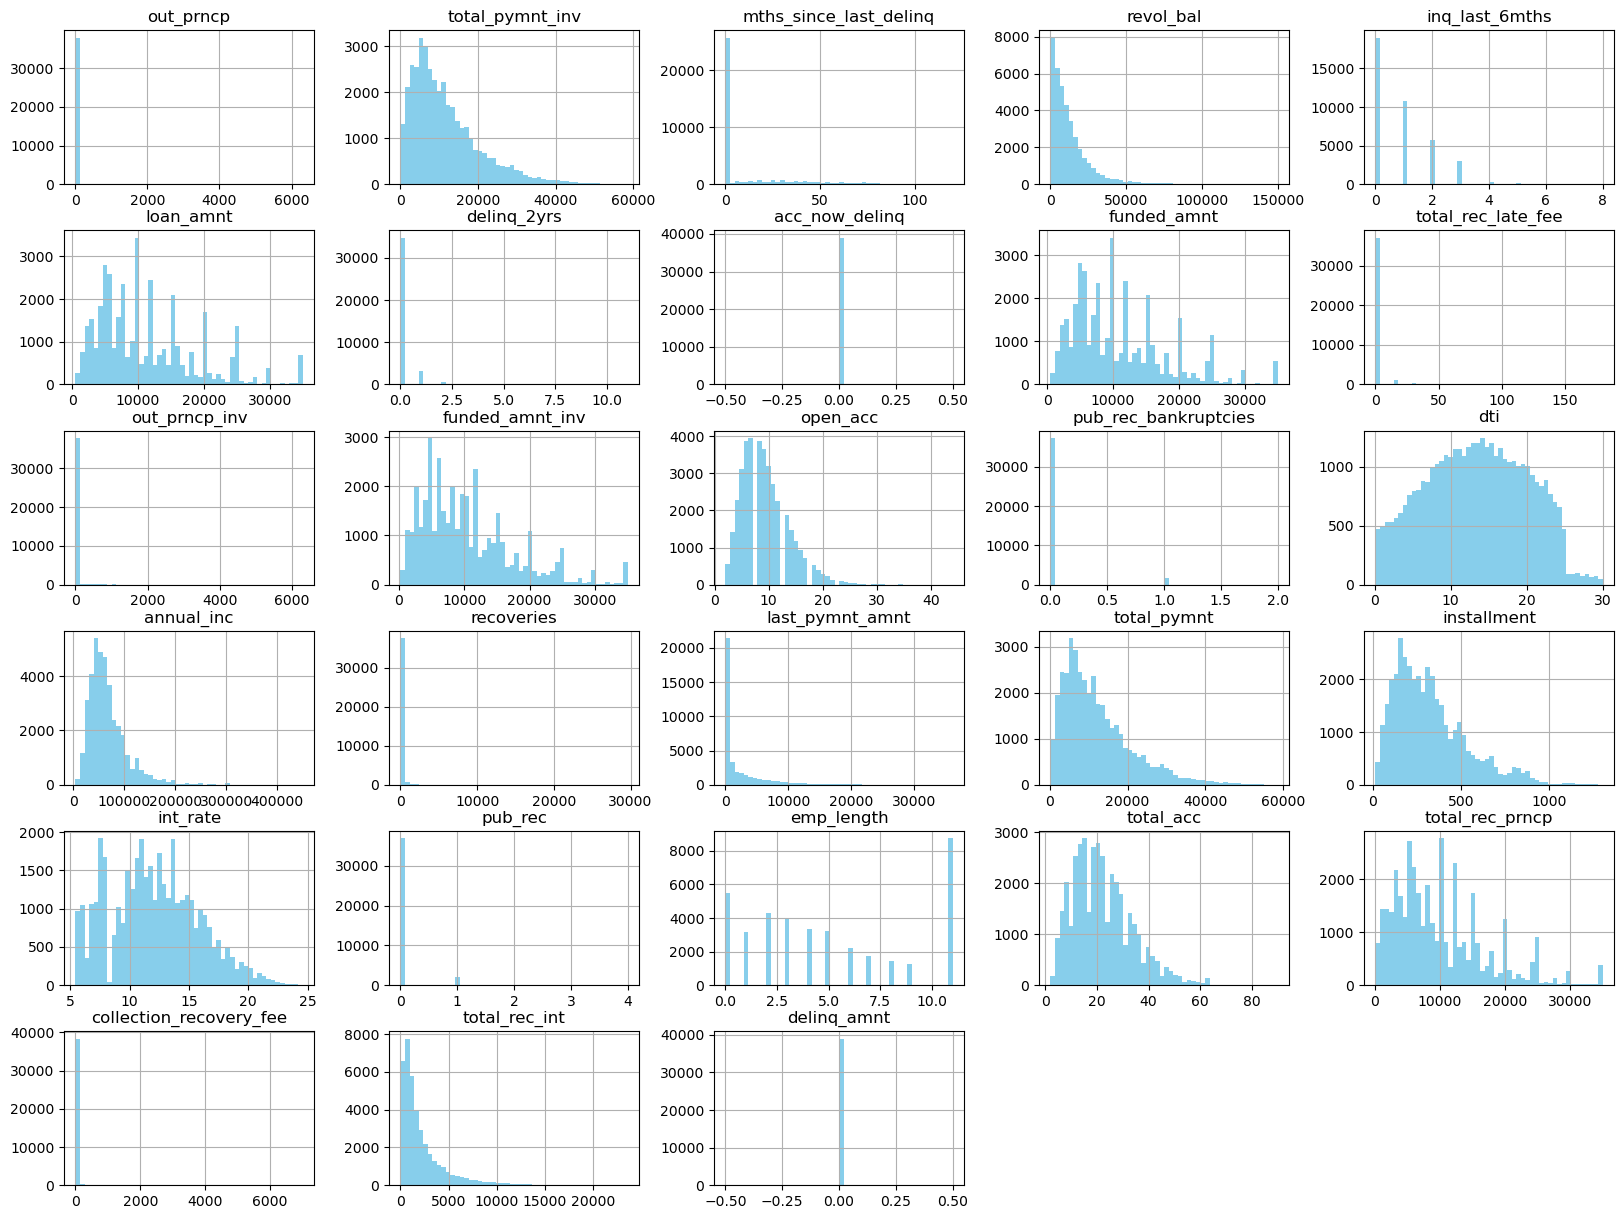

In [0]:
# Creating histograms to check the distribution of the numeric variables to see if there are any abnormalities. No abnormalities recorded.
loanData.hist(bins=50, figsize=(20,15), color='skyblue')

In [0]:
# Creating a list of numeric and categorical columns separately that would help us in further analysis
df_types=loanData.dtypes
numeric_columns=list(df_types[df_types!="object"].index)
categorial_columns=list(df_types[df_types=="object"].index)

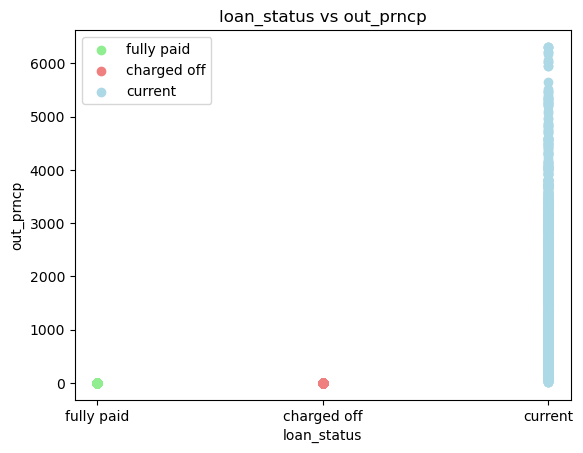

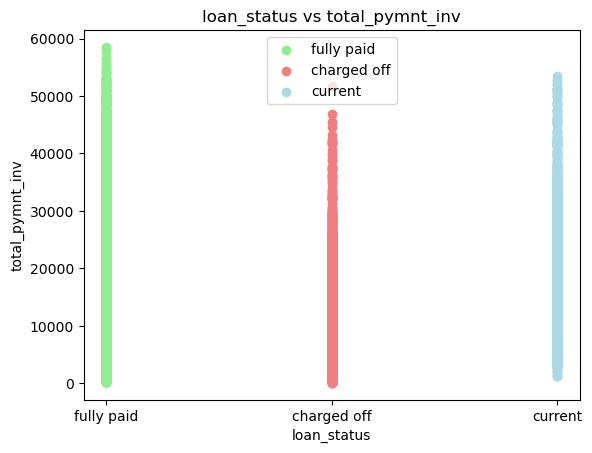

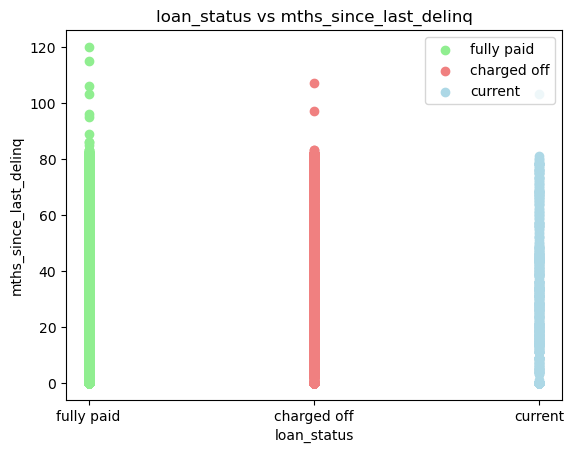

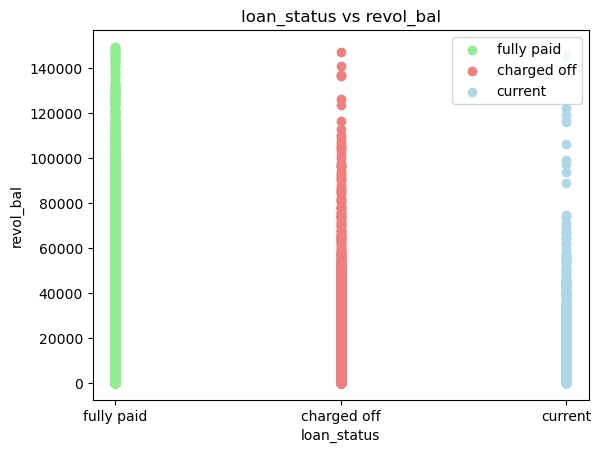

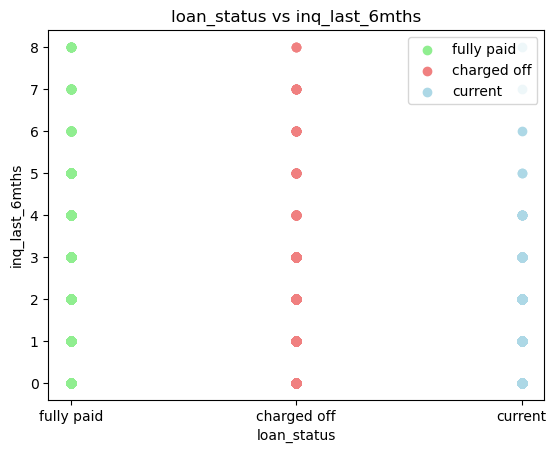

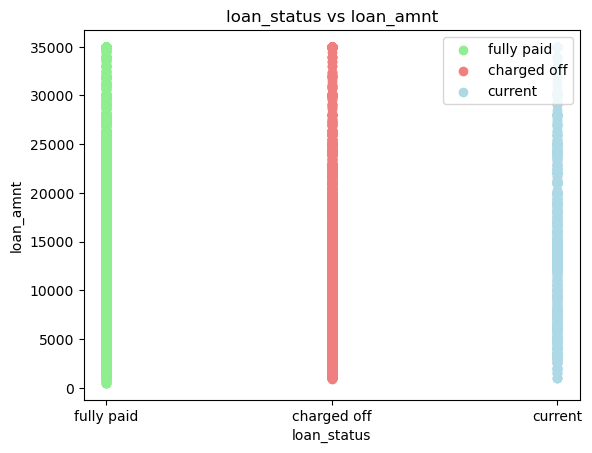

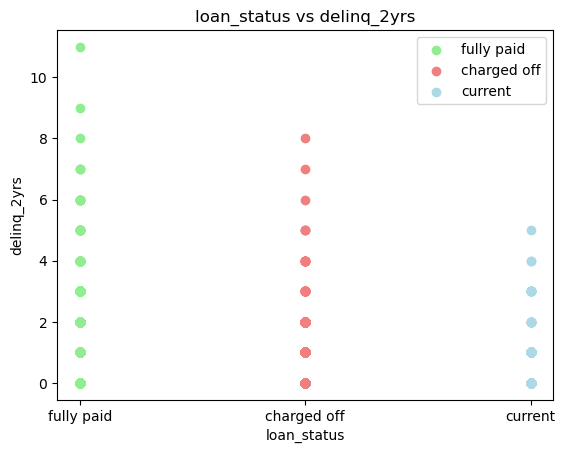

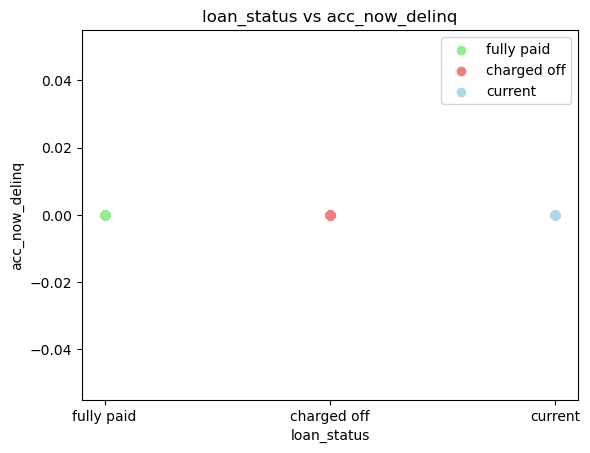

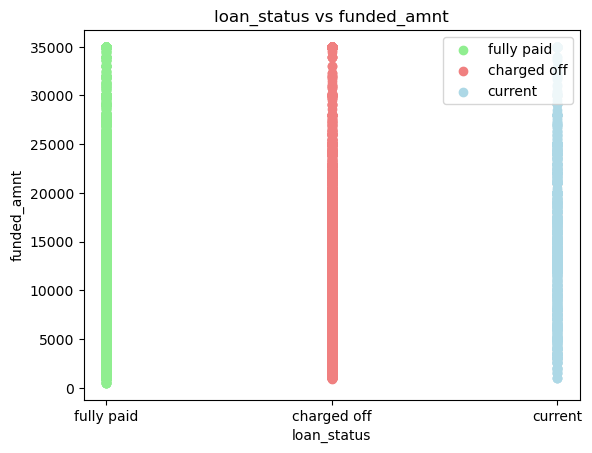

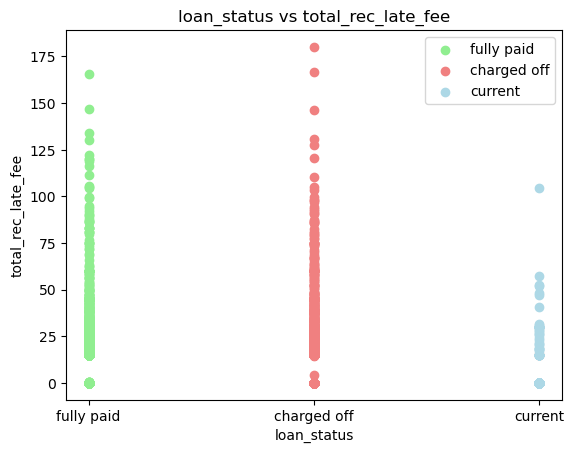

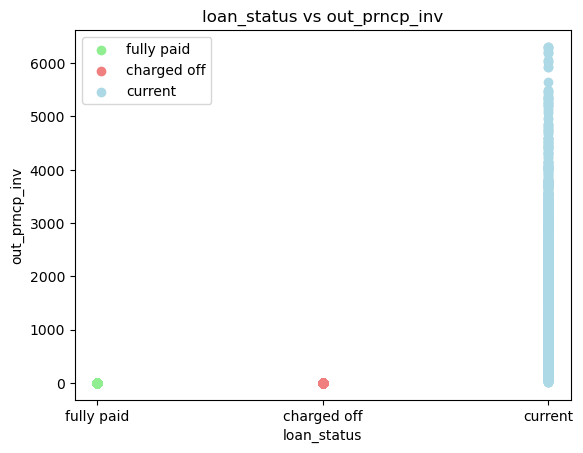

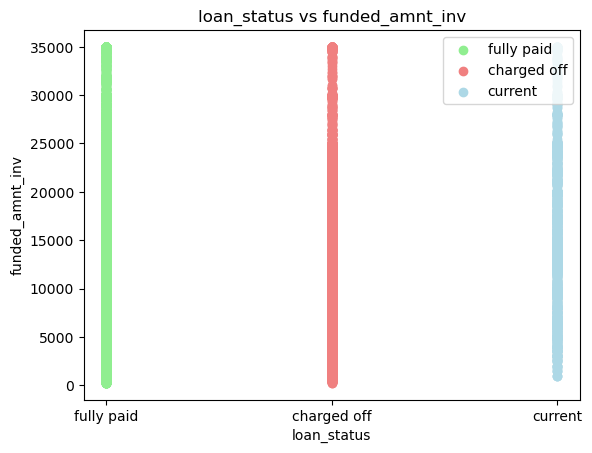

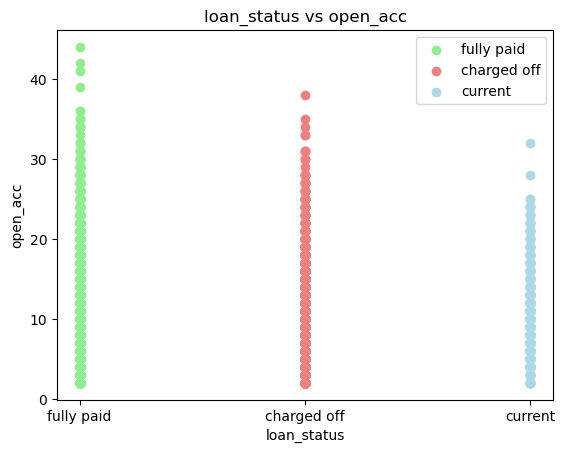

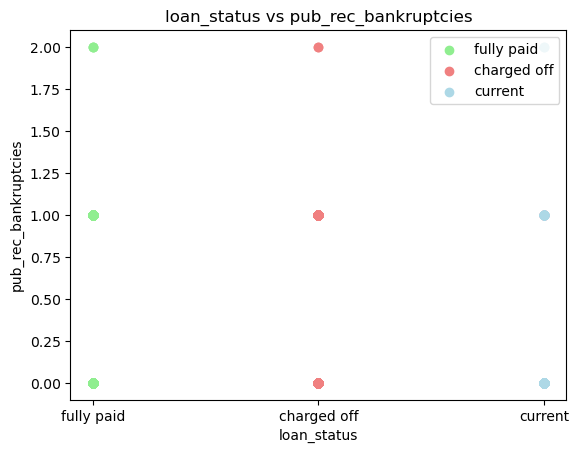

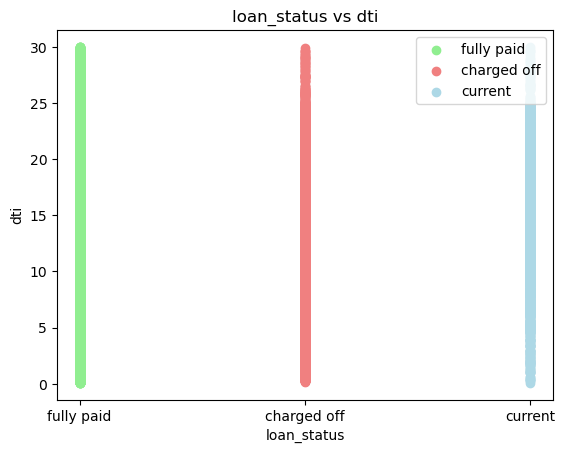

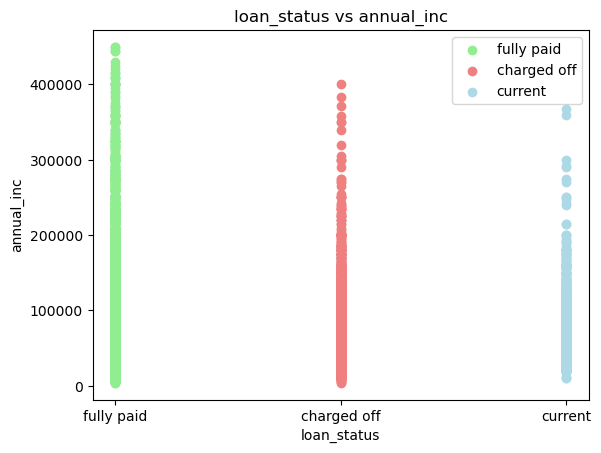

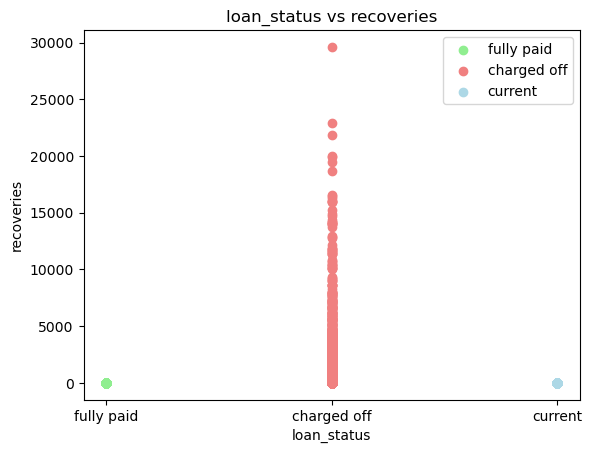

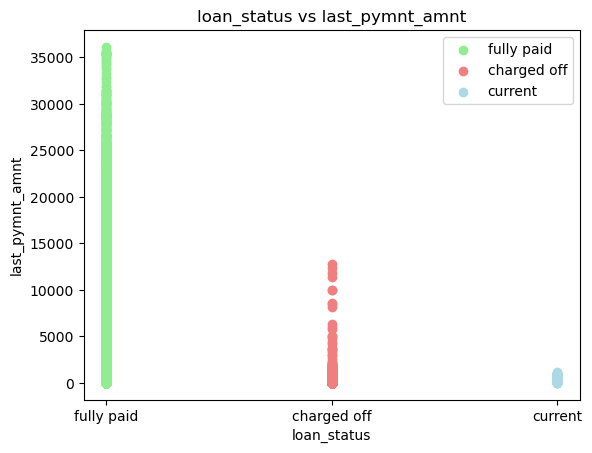

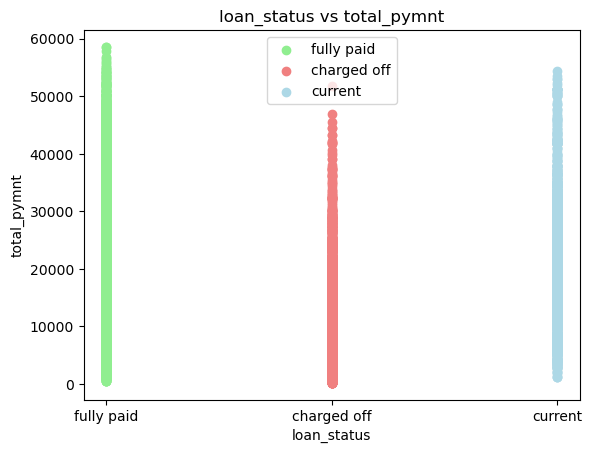

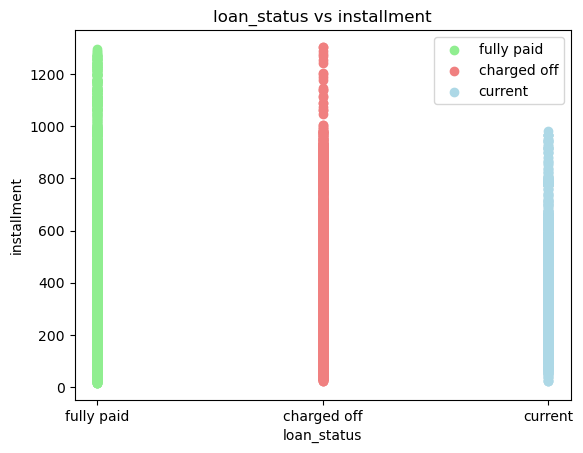

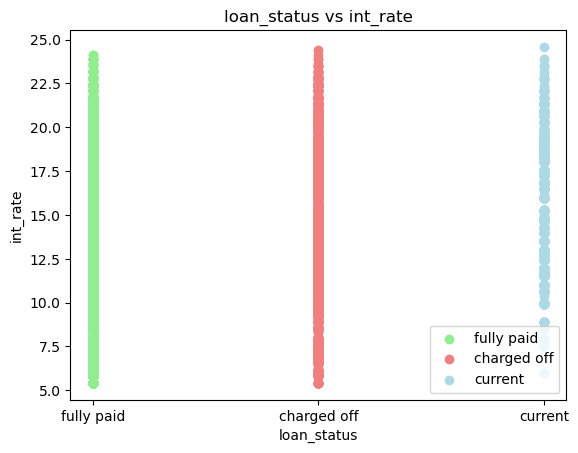

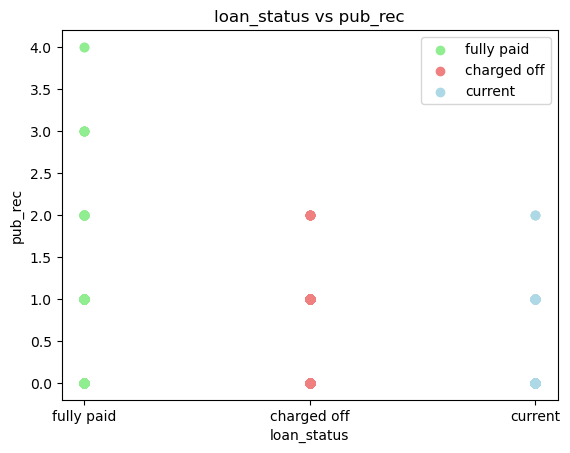

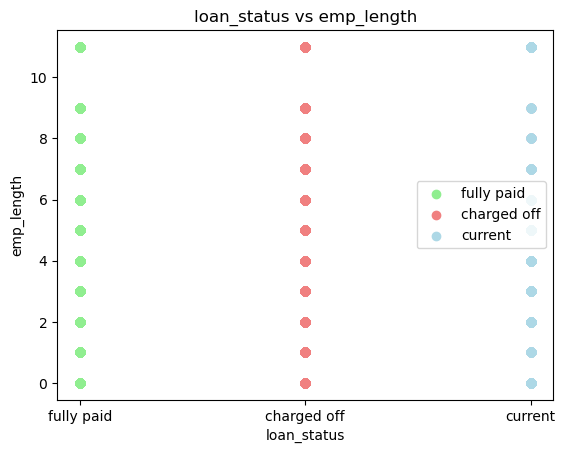

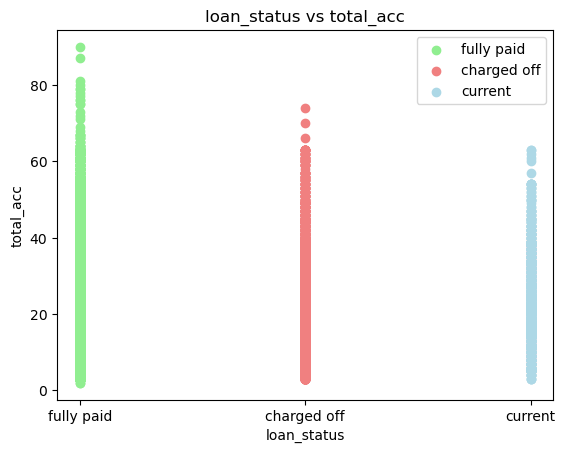

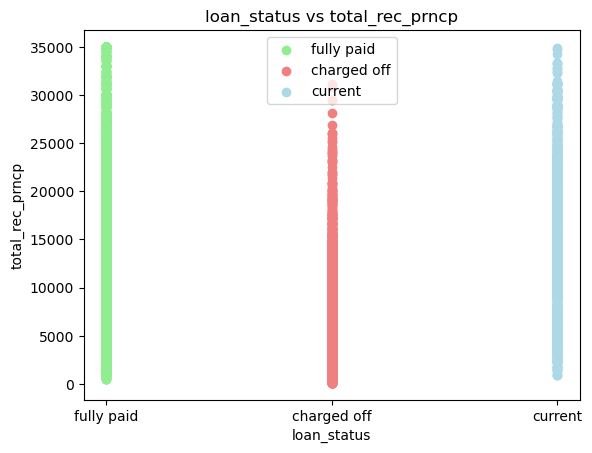

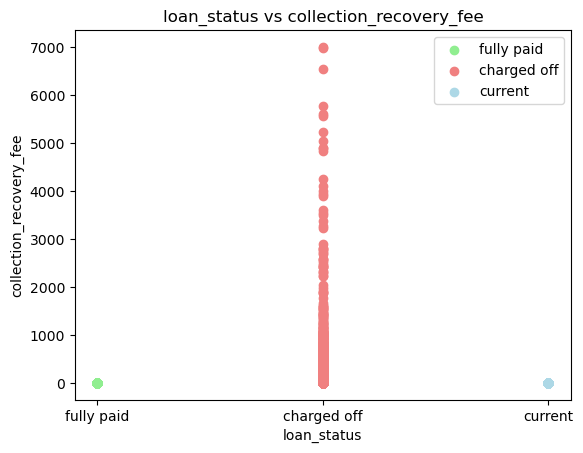

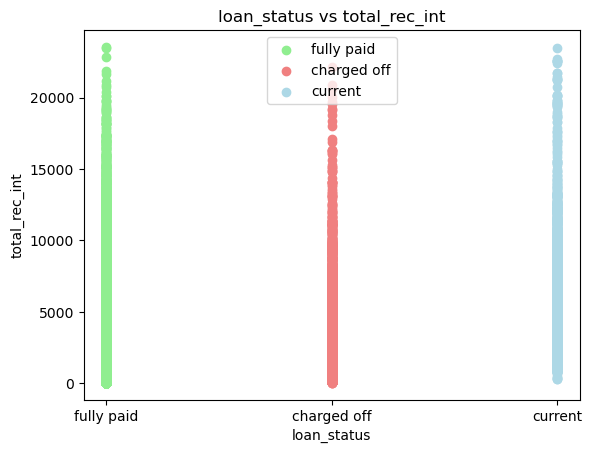

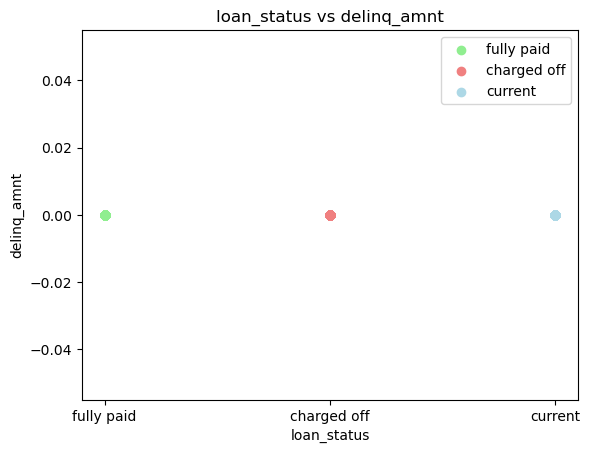

In [0]:
# Creating scatter plots of all the numeric columns against each loan_status and trying to compare the "fully paid" and "charged off" loan trends

#Choosing colors to suggest the different loan_status

colors = {"fully paid": "lightgreen", "current": "lightblue", "charged off": "lightcoral"}
for a in numeric_columns:
    figure = plt.figure()
    ax = plt.gca()
    for status in loanData["loan_status"].unique():
        subset = loanData[loanData["loan_status"] == status]
        ax.scatter(subset["loan_status"], subset[a], color=colors.get(status, "black"), label=status)
    ax.set_xlabel("loan_status")
    ax.set_ylabel(a)
    ax.set_title("{} vs {}".format("loan_status", a))
    ax.legend()
    plt.show()

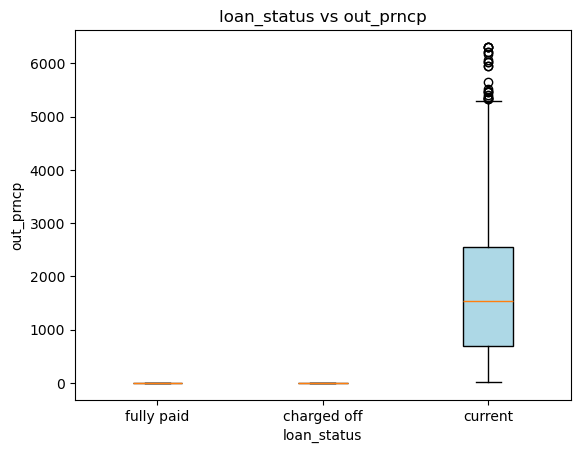

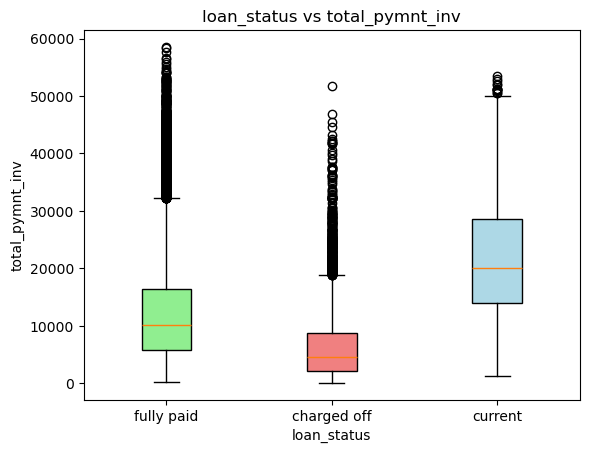

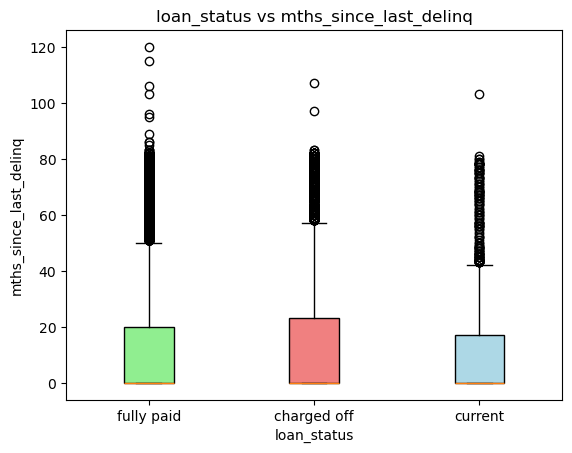

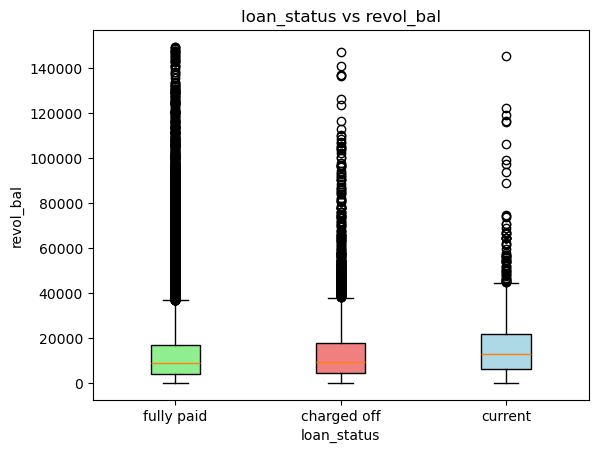

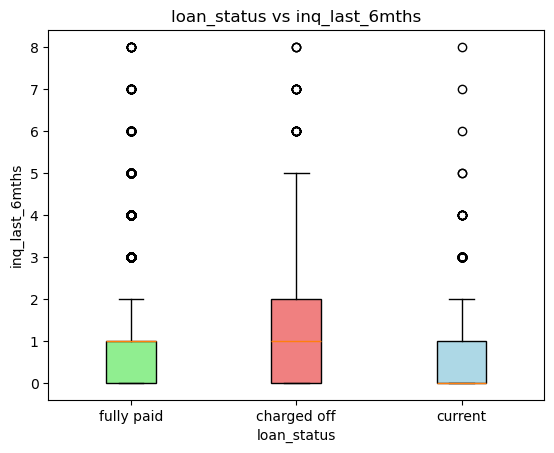

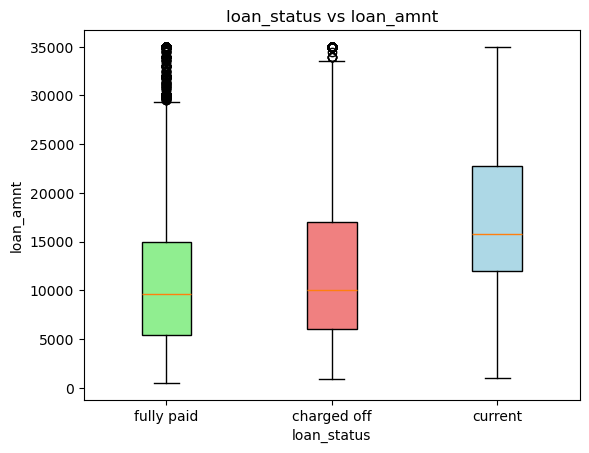

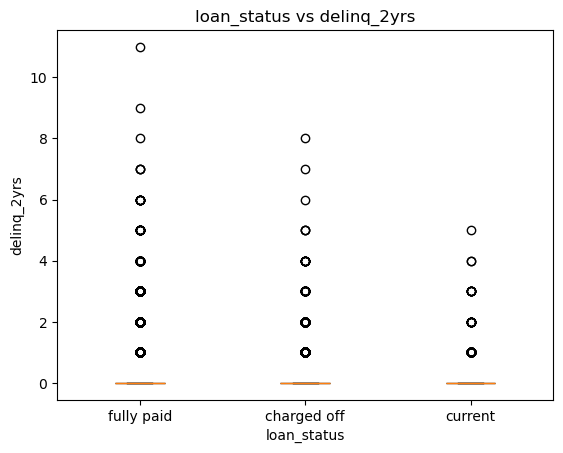

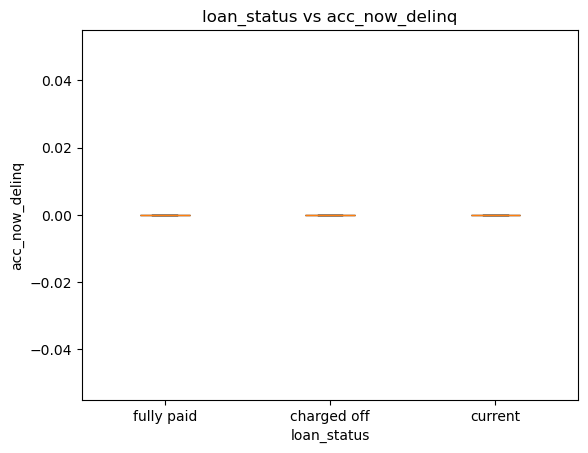

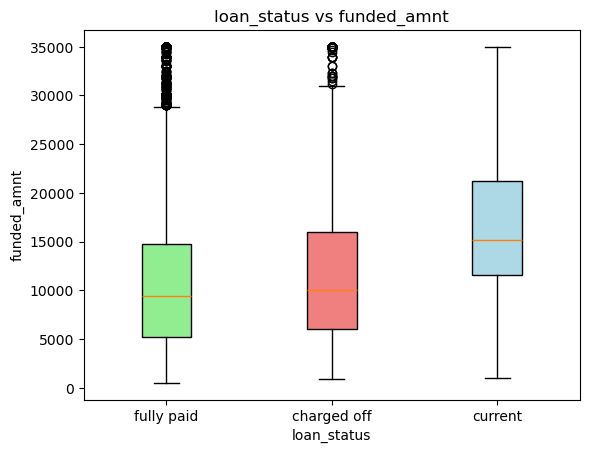

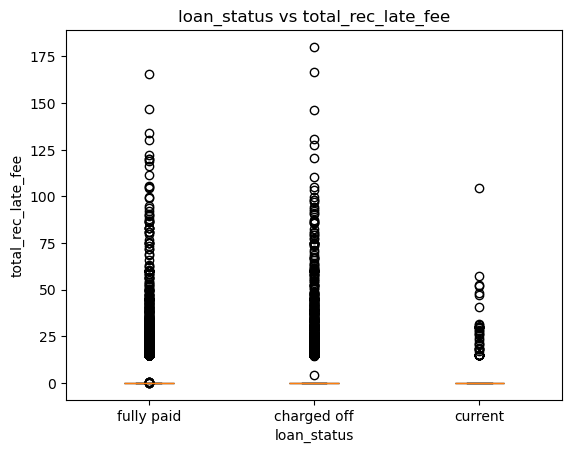

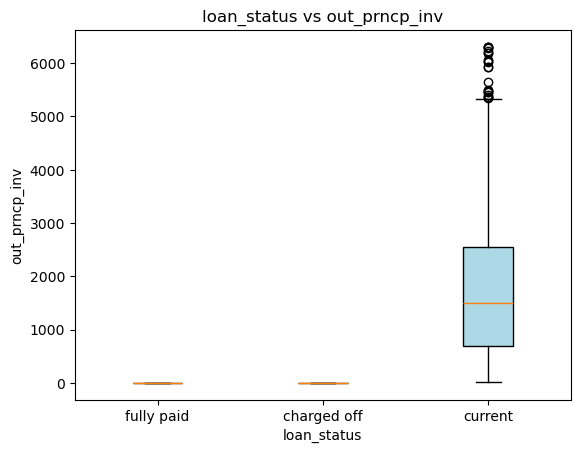

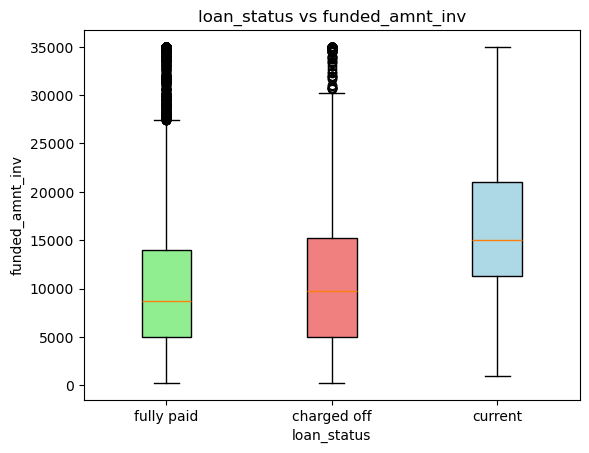

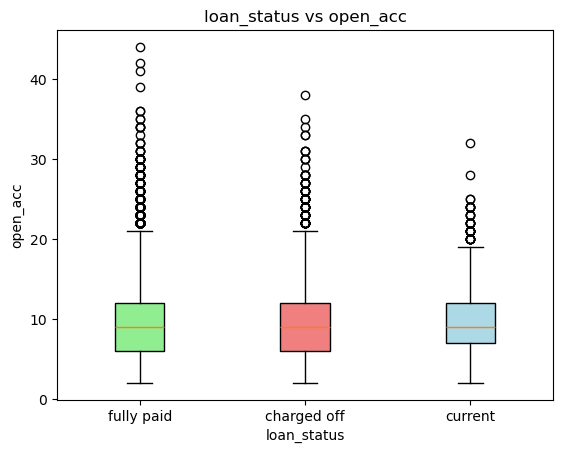

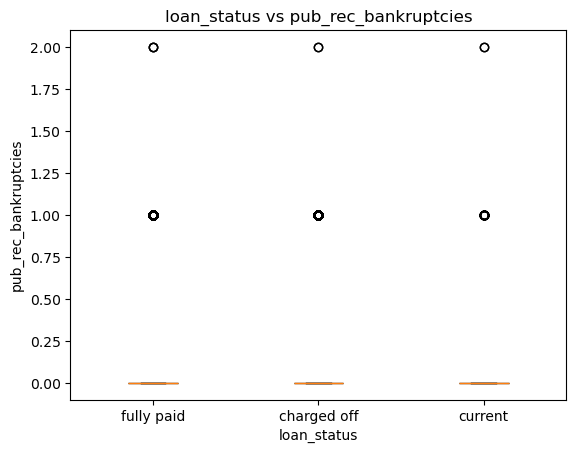

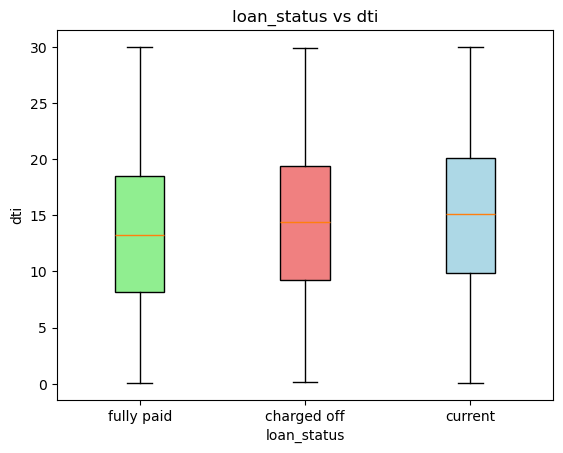

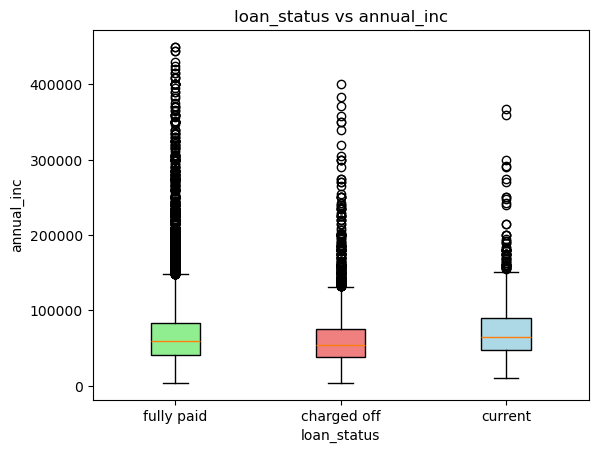

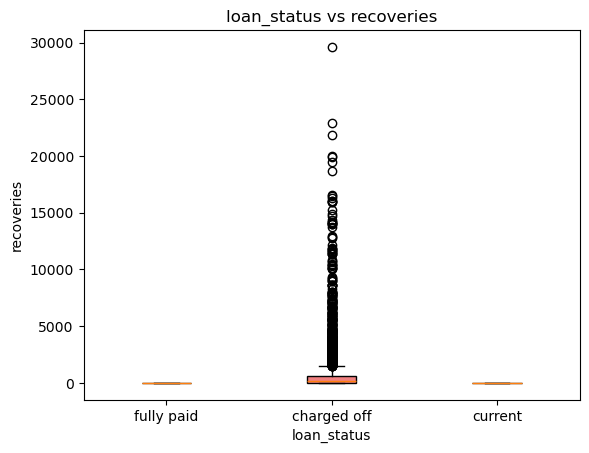

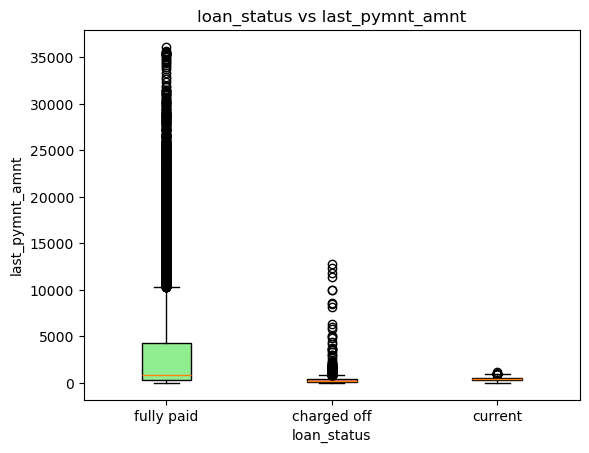

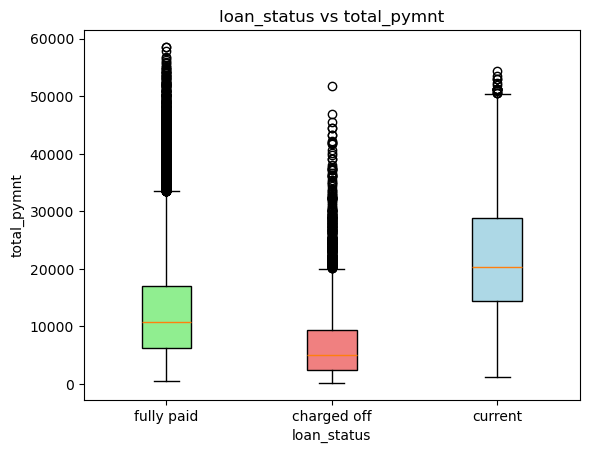

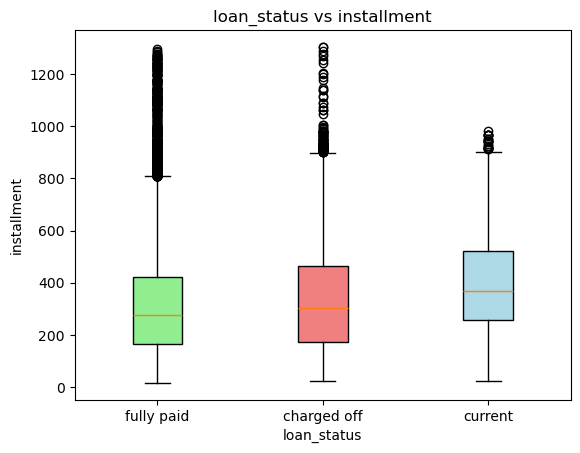

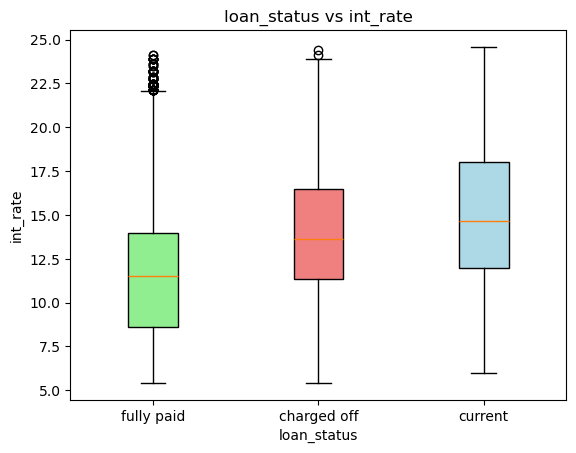

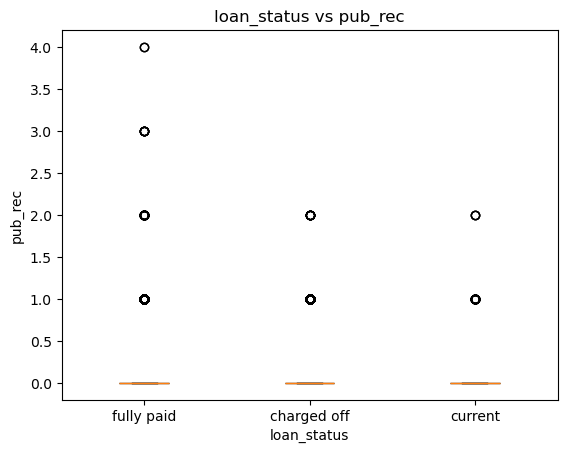

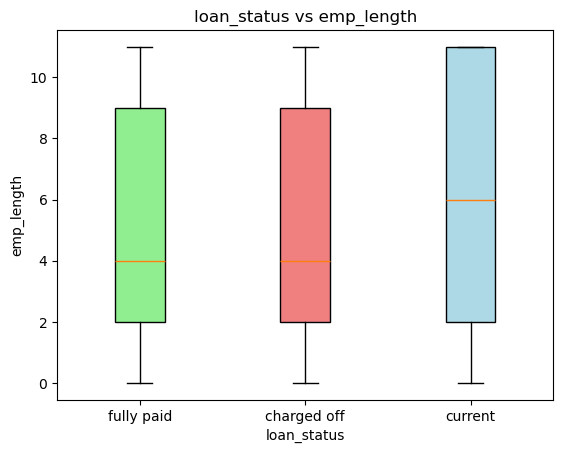

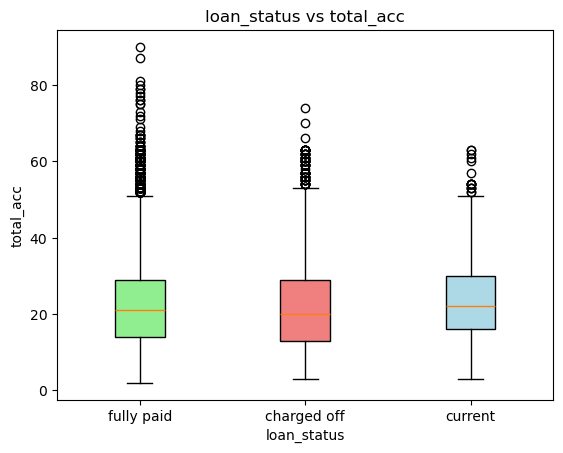

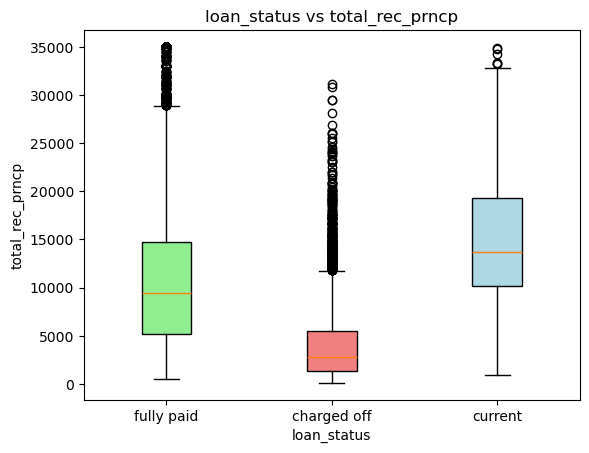

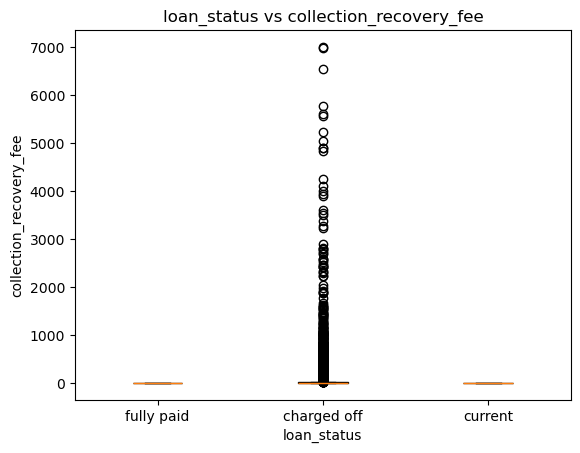

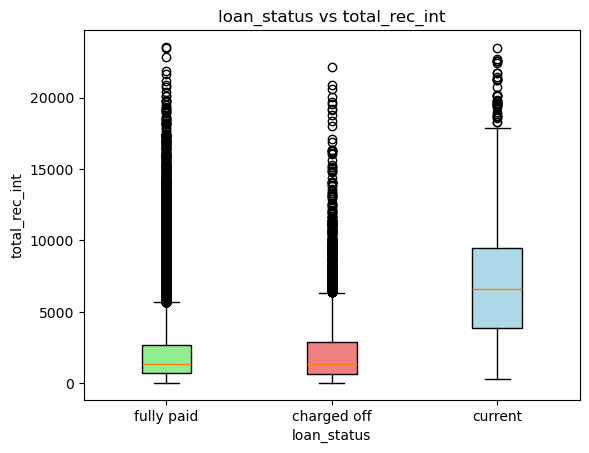

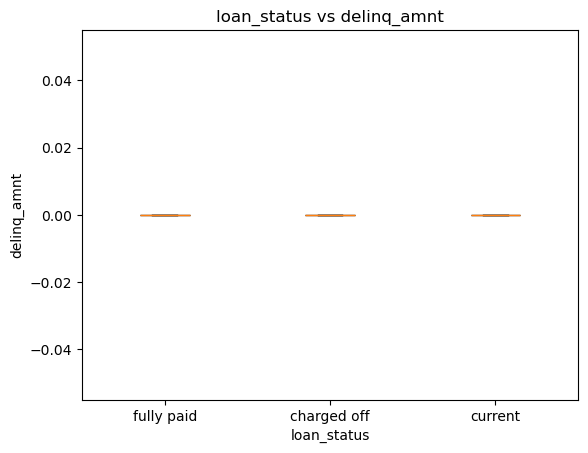

In [0]:
# Creating box plots of all the numeric columns against each loan_status and trying to compare the "fully paid" and "charged off" loan trends

#Choosing colors to suggest the different loan_status

colors = {"fully paid": "lightgreen", "current": "lightblue", "charged off": "lightcoral"}
for a in numeric_columns:
    figure = plt.figure()
    ax = plt.gca()
    data_to_plot = []
    box_colors = []
    for status in loanData["loan_status"].unique():
        subset = loanData[loanData["loan_status"] == status]
        data_to_plot.append(subset[a])
        box_colors.append(colors.get(status, "black"))
    box = ax.boxplot(data_to_plot, patch_artist=True)
    for patch, color in zip(box['boxes'], box_colors):
        patch.set_facecolor(color)
    ax.set_xticklabels(loanData["loan_status"].unique())
    ax.set_xlabel("loan_status")
    ax.set_ylabel(a)
    ax.set_title("{} vs {}".format("loan_status", a))
    plt.show()

### **Univariate Analysis Findings:**
**Incase we do-not have loan history of the applicant:**
- '36 months' loans have a higher chance of getting fully paid off as compared to '60 months' term loans
- Higher interest rates(11.5% and above) are more difficult to be paid off as compared to lower interest rates(6% to 12%)

**Incase we have the loan history of the applicant, we can also use the below findings in addition to the above ones:**
- "inq_last_6mths" : Defaulters have higher number of inquiries 1-5 in the last 6 months whereas non-defaulters have mostly 0 or 1 inquiry. 
- "recoveries" : post charge off gross recovery is much higher in the range of 100 to 16k for defaulters whereas it is almost 0 for non-defaulters. 
- "total_rec_prncp" : Principal received to date for the loan defaulters is much less as compared to the non-defaulters. For defaulters it lies in the range of 1k to 5k whereas it lies in the range 5k to 14k for non-defaulters.


## Distribution plots

In [0]:
# Calulate Percentage
def calculate_percentdata(df, column1, column2):
    # Calculate the percentage of each unique value in column1
    df_percentage = 100*df[column1].value_counts()/df.shape[0]
     # Reset the index to convert Series to DataFrame
    df_percentage = df_percentage.reset_index()
    # Rename the columns appropriately
    df_percentage.columns = [column1, column2]
    return df_percentage

def configure_plotsize(x,y):
    plt.figure(figsize=(x,y))

def configure_plot(plotTitle, plotXlabel, plotYlabel, plotXTick, plotYTick):
        # Graph Title
        plt.title(plotTitle)
        # Graph X-Axis Label
        plt.xlabel(plotXlabel)
        # Graph Y-Axis Label
        plt.ylabel(plotYlabel)
        # Rotation of X-Axis Labels
        if(plotXTick>0):
            plt.xticks(rotation=plotXTick)
        # Rotaion of Y-axis Labels
        if(plotYTick>0):
            plt.yticks(rotation=plotYTick)

def annonate_plot(bar_plot):
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_height():.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      size=12, xytext=(0, 5), 
                      textcoords='offset points')
        
def draw_boxplot(df, x_var, y_var):
    sns.boxplot(data=df, x=x_var, y=y_var, hue=x_var, palette='viridis', legend=False)

def draw_countplot(df, x_var, hue_var):
    sns.countplot(data=df, x=x_var, hue=hue_var, palette='viridis')

def draw_barplot(df, x_var, y_var, annonate):
    bar_plot = sns.barplot(data=df, x=x_var, y=y_var, hue=x_var, palette='viridis', legend=False)
    if(annonate):
        annonate_plot(bar_plot)                

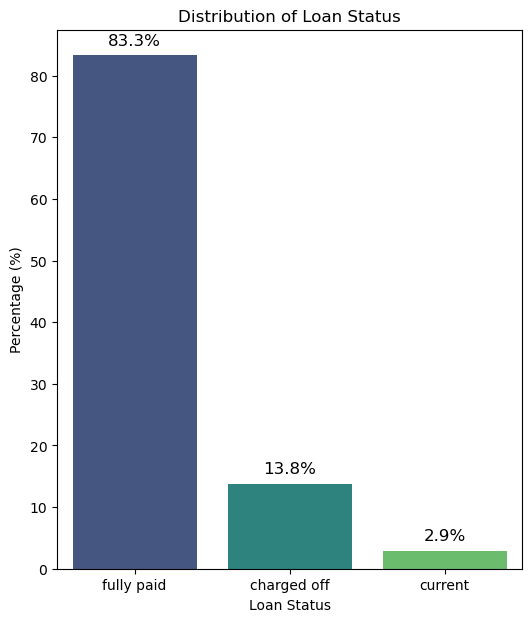

In [0]:
# Distribution of Loan Status
loan_status_percentage = calculate_percentdata(loanData, 'loan_status', 'percentage')
configure_plotsize(6,7)
configure_plot('Distribution of Loan Status', 'Loan Status', 'Percentage (%)', 0, 0)
draw_barplot(loan_status_percentage, x_var='loan_status', y_var='percentage', annonate=True)
plt.show()

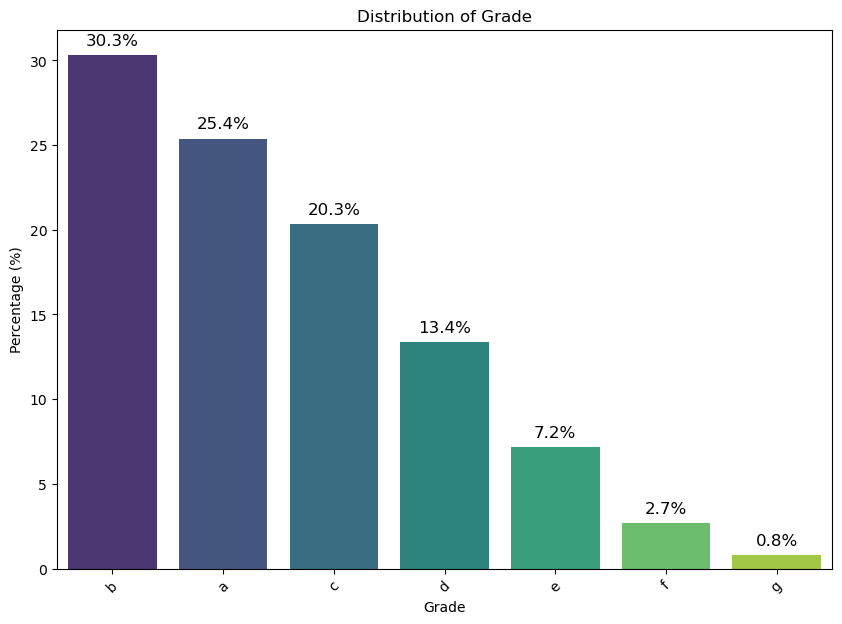

In [0]:
# Grade - Distribution Graph
grade_percentage = calculate_percentdata(loanData, 'grade', 'percentage')

configure_plotsize(10,7)
configure_plot('Distribution of Grade', 'Grade', 'Percentage (%)', 45, 0)
draw_barplot(grade_percentage, x_var='grade', y_var='percentage', annonate=True)
plt.show()

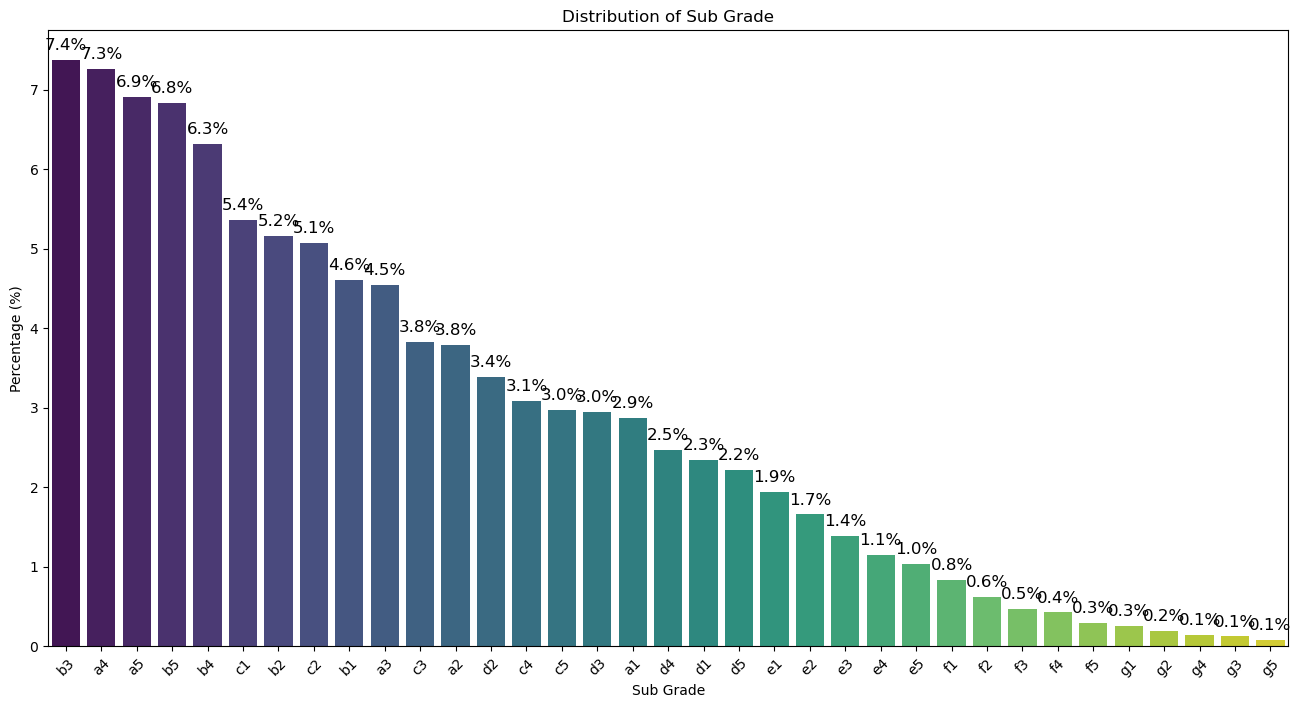

In [0]:
# Sub-Grade - Distribution Graph
grade_percentage = calculate_percentdata(loanData, 'sub_grade', 'percentage')

configure_plotsize(16,8)
configure_plot('Distribution of Sub Grade', 'Sub Grade', 'Percentage (%)', 45, 0)
draw_barplot(grade_percentage, x_var='sub_grade', y_var='percentage', annonate=True)
plt.show()

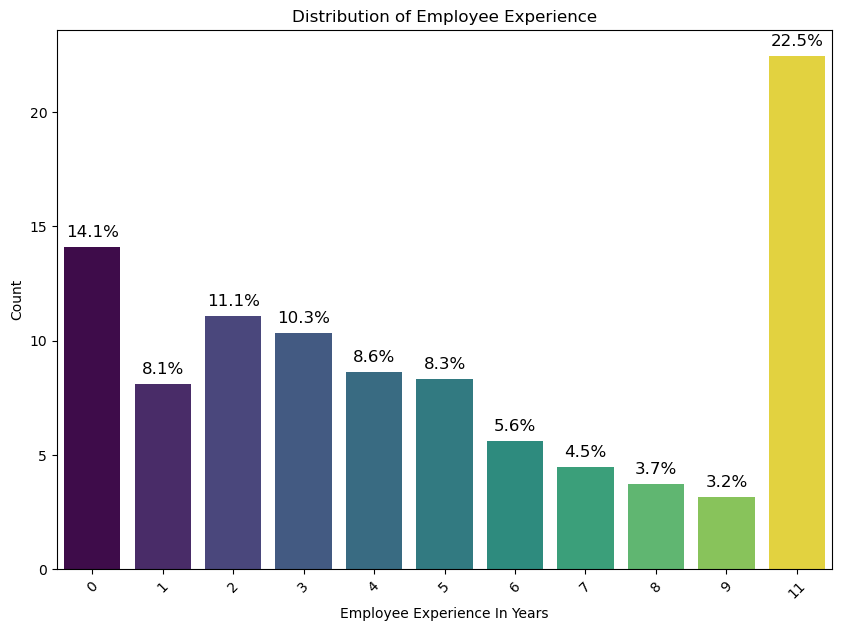

In [0]:
# Precentage of Employee Exprience
emp_length_percentage = calculate_percentdata(loanData, 'emp_length', 'percentage')

configure_plotsize(10,7)
configure_plot('Distribution of Employee Experience', 'Employee Experience In Years', 'Count', 45, 0)

draw_barplot(emp_length_percentage, x_var='emp_length', y_var='percentage', annonate=True)

plt.show()

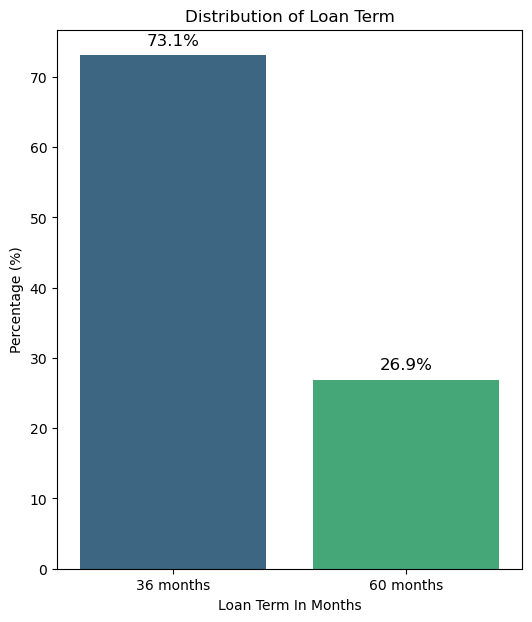

In [0]:
# Loan Term Percantage
loan_term_percentage = calculate_percentdata(loanData, 'term', 'percentage')

configure_plotsize(6,7)
configure_plot('Distribution of Loan Term', 'Loan Term In Months', 'Percentage (%)', 0, 0)
draw_barplot(loan_term_percentage, x_var='term', y_var='percentage', annonate=True)
plt.show()

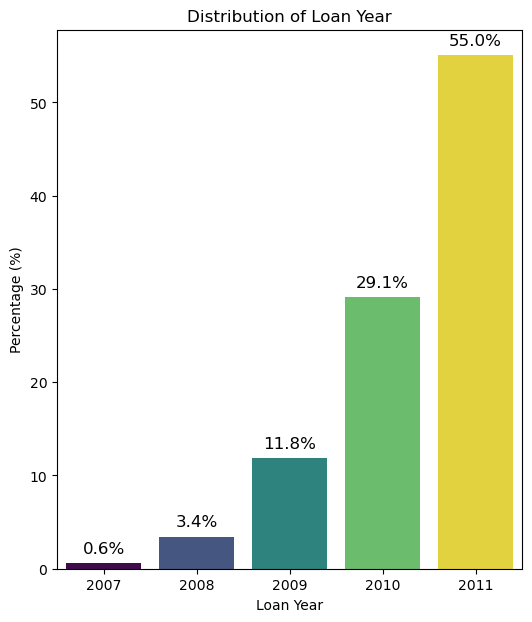

In [0]:
# Loan Year Percantage
loan_year_percentage = calculate_percentdata(loanData, 'issue_year', 'percentage')

configure_plotsize(6,7)
configure_plot('Distribution of Loan Year', 'Loan Year', 'Percentage (%)', 0, 0)
draw_barplot(loan_year_percentage, x_var='issue_year', y_var='percentage', annonate=True)
plt.show()

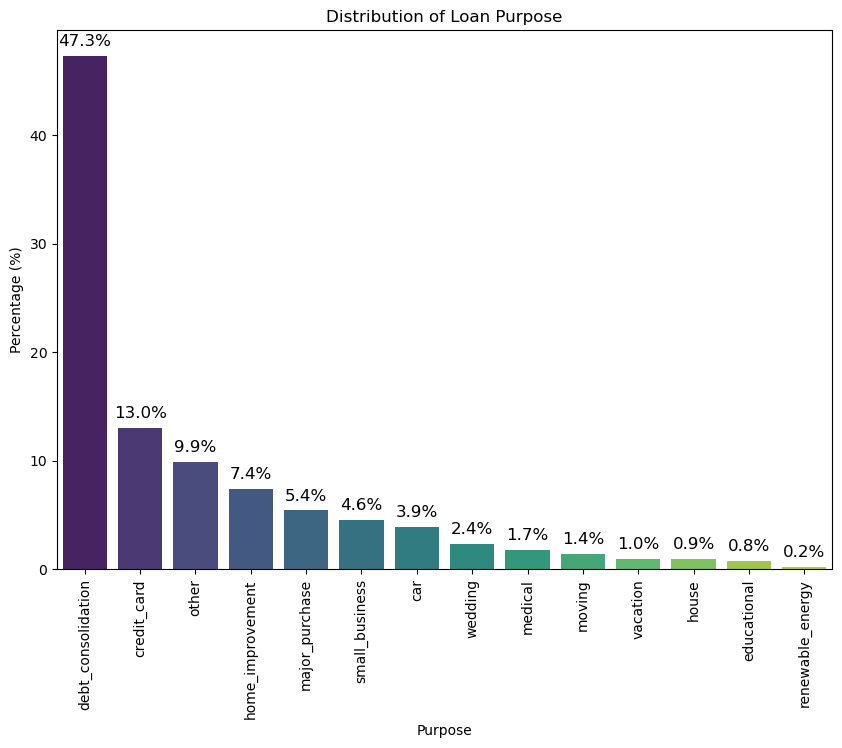

In [0]:
# Loan Purpose Percantage
loan_purpose_percentage = calculate_percentdata(loanData, 'purpose', 'percentage')

configure_plotsize(10,7)
configure_plot('Distribution of Loan Purpose', 'Purpose', 'Percentage (%)', 90, 0)
draw_barplot(loan_purpose_percentage, x_var='purpose', y_var='percentage', annonate=True)
plt.show()

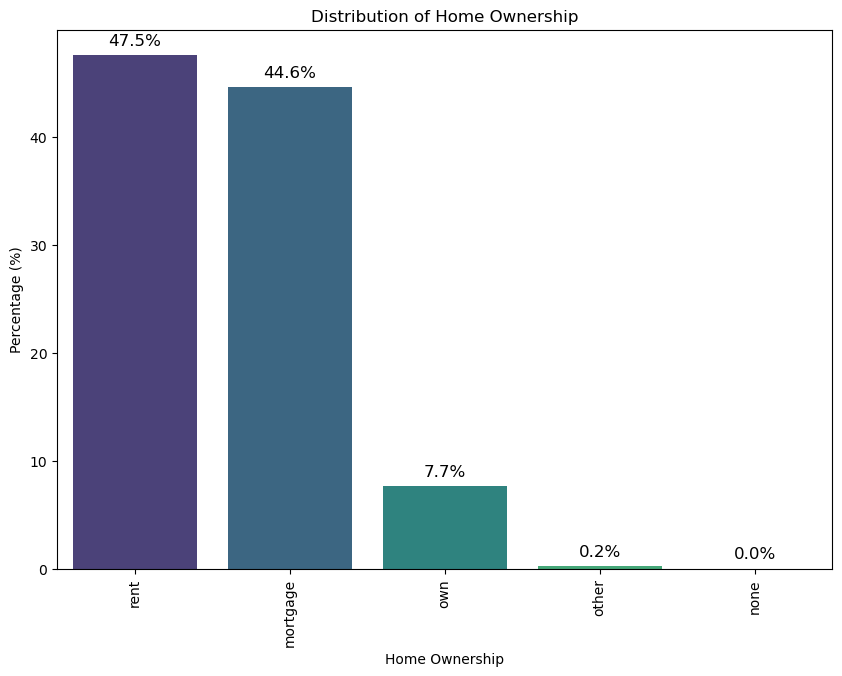

In [0]:
# Home Ownership Percantage
home_ownership_percentage = calculate_percentdata(loanData, 'home_ownership', 'percentage')

configure_plotsize(10,7)
configure_plot('Distribution of Home Ownership', 'Home Ownership', 'Percentage (%)', 90, 0)
draw_barplot(home_ownership_percentage, x_var='home_ownership', y_var='percentage', annonate=True)
plt.show()

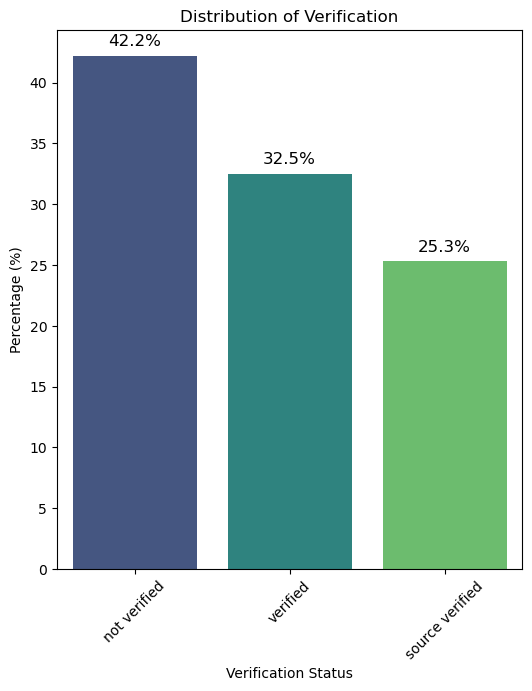

In [0]:
# Verification Status Percentage
verification_status_percentage = calculate_percentdata(loanData, 'verification_status', 'percentage')

configure_plotsize(6,7)
configure_plot('Distribution of Verification', 'Verification Status', 'Percentage (%)', 45, 0)
draw_barplot(verification_status_percentage, x_var='verification_status', y_var='percentage', annonate=True)
plt.show()

### Distribution plots findings:
1. Loan Purpose Distribution: The distribution of loan purposes indicates that the majority of 'Charged Off' applications are for 'Debt consolidation'.
2. Grade Distribution: The grade distribution reveals that a significant number of 'Charged Off' loans originate from the A, B, and C categories, suggesting a need to reevaluate the company's grading criteria.
3. Popularity of Short-Term Loans: Loans with a duration of 36 months are the most popular and show a higher likelihood of repayment.
4. 2011 Charged Off Applications: The year 2011 saw the highest number of 'Charged Off' loan applications, possibly due to economic or financial challenges during that period.
5. California's Charged Off Applications: California has the highest number of 'Charged Off' loan applicants. In this state, the lending company should consider implementing stricter eligibility criteria and increasing interest rates.
6. Housing Status of Charged Off Participants: The majority of 'Charged Off' loan participants reside in rented accommodations.
7. Verification Process Concerns: The lending company has inadequately conducted the verification process, as most 'Charged Off' applicants are unverified.
8.Experience vs. Repayment Likelihood: A high level of experience does not correlate with a greater likelihood of repayment; applicants with over 10 years of experience have the highest number of 'Charged Off' loans.

## Segmented Univariate Analysis

In [0]:
# Checking some basic metrics using the numeric features for the defaulters(loan_status="Charged Off")
loanData_defaulters=loanData[loanData["loan_status"]=="charged off"]
loanData_defaulters.describe()

,pub_rec,installment,total_rec_prncp,last_pymnt_amnt,annual_inc,loan_amnt,revol_bal,mths_since_last_delinq,delinq_2yrs,emp_length,funded_amnt,delinq_amnt,open_acc,total_rec_late_fee,out_prncp_inv,collection_recovery_fee,int_rate,total_pymnt,inq_last_6mths,total_pymnt_inv,recoveries,total_rec_int,funded_amnt_inv,out_prncp,dti,pub_rec_bankruptcies,acc_now_delinq,total_acc
count,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.00000,5382.000000,5382.000000,5382.000000,5382.0,5382.000000,5382.000000,5382.0,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.0,5382.000000,5382.000000,5382.0,5382.000000
mean,0.084355,341.369303,4082.389119,334.719389,61714.287445,12318.046265,13673.757711,13.86139,0.166852,5.167781,11962.235229,0.0,9.251394,4.337681,0.0,88.558600,13.847111,7038.956443,1.049238,6594.209350,684.285336,2267.944266,11147.272882,0.0,14.151202,0.065589,0.0,21.608881
std,0.284553,216.199744,3976.259077,537.751956,37181.560241,8076.216202,15110.626055,22.57440,0.527301,4.011679,7743.239965,0.0,4.514752,12.869786,0.0,390.964291,3.671372,6639.882824,1.149481,6498.715344,1740.241051,2569.328058,7604.199013,0.0,6.501244,0.249082,0.0,11.397008
min,0.000000,22.790000,90.200000,3.240000,4080.000000,900.000000,0.000000,0.00000,0.000000,0.000000,900.000000,0.0,2.000000,0.000000,0.0,0.000000,5.420000,230.000000,0.000000,128.080000,0.000000,27.980000,250.000533,0.0,0.140000,0.000000,0.0,3.000000
25%,0.000000,172.702500,1299.222500,121.592500,38000.000000,6000.000000,4184.250000,0.00000,0.000000,2.000000,6000.000000,0.0,6.000000,0.000000,0.0,0.000000,11.360000,2375.035000,0.000000,2087.365000,9.542500,608.745000,5000.000000,0.0,9.252500,0.000000,0.0,13.000000
50%,0.000000,301.040000,2819.860000,246.240000,54000.000000,10000.000000,9432.500000,0.00000,0.000000,4.000000,10000.000000,0.0,9.000000,0.000000,0.0,2.590000,13.610000,5013.285000,1.000000,4553.385000,180.540000,1354.170000,9740.587139,0.0,14.405000,0.000000,0.0,20.000000
75%,0.000000,463.167500,5478.807500,414.250000,75000.000000,17000.000000,17702.250000,23.00000,0.000000,9.000000,16000.000000,0.0,12.000000,0.000000,0.0,9.534125,16.450000,9464.282500,2.000000,8805.820000,612.800000,2897.550000,15181.250000,0.0,19.360000,0.000000,0.0,29.000000
max,2.000000,1305.190000,31115.810000,12818.380000,400000.000000,35000.000000,147365.000000,107.00000,8.000000,11.000000,35000.000000,0.0,38.000000,180.200000,0.0,7002.190000,24.400000,51745.450000,8.000000,51671.580000,29623.350000,22122.300000,35000.000000,0.0,29.850000,2.000000,0.0,74.000000


In [0]:
# Doing segmented analysis for all the 'loan_status' values against 'term' and 'home_ownership' and normalizing the results to understand the percentage of each category in each segment
loanData_cols=loanData[['loan_status','term','home_ownership']] 

#Creating Normalized Pivot to better understand the data
loanData_pivot=(loanData_cols.set_index('loan_status').stack()
 .groupby(level=[0,1])
 .value_counts(normalize=True)
 .unstack(level=[1,2])
 .fillna(0)
 .sort_index(axis=1))

loanData_pivot

home_ownership                      ...                term          
                  mortgage      none     other  ...      rent 36 months 60 months
loan_status                                     ...                              
charged off       0.417689  0.000000  0.003159  ...  0.500000   0.56466   0.43534
current           0.558304  0.000000  0.000000  ...  0.368375   0.00000   1.00000
fully paid        0.446429  0.000093  0.002221  ...  0.474772   0.78371   0.21629

[3 rows x 7 columns]

In [0]:
# Doing segmented analysis for all the 'loan_status' values against 'purpose'and 'verification_status'  and normalizing the results to understand the percentage of each category in each segment
loanData_cols=loanData[['loan_status','purpose','verification_status']] 

#Creating Normalized Pivots to better understand the data
loanData_pivot=(loanData_cols.set_index('loan_status').stack()
 .groupby(level=[0,1])
 .value_counts(normalize=True)
 .unstack(level=[1,2])
 .fillna(0)
 .sort_index(axis=1))

loanData_pivot

purpose              ... verification_status          
                  car credit_card  ...     source verified  verified
loan_status                        ...                              
charged off  0.029171    0.098105  ...            0.259569  0.370680
current      0.043286    0.090989  ...            0.272968  0.527385
fully paid   0.040464    0.136843  ...            0.251295  0.310357

[3 rows x 17 columns]

### **Segmented Univariate Analysis Findings:**
  1. Most of the non-defaulters take loans for smaller periods (36 months) whereas defaulters take loans for a mix of smaller(36 months) and longer periods (60 months).


## Bivariate Analysis

### Bivariate Analysis for numeric features

In [0]:
# Creating correlation matrix for the numeric features and getting the pairs with correlation above 0.8
corr = loanData.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending=True, inplace=True)
columns_above_80 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.8 and col1 != col2]

/root/.ipykernel/1996/command-3978493850325177-1338307534:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loanData.corr()


In [0]:
# The complete correlation matrix
corr

,pub_rec,installment,total_rec_prncp,last_pymnt_amnt,annual_inc,loan_amnt,revol_bal,mths_since_last_delinq,delinq_2yrs,emp_length,funded_amnt,delinq_amnt,open_acc,total_rec_late_fee,out_prncp_inv,collection_recovery_fee,int_rate,total_pymnt,inq_last_6mths,total_pymnt_inv,recoveries,total_rec_int,funded_amnt_inv,out_prncp,dti,pub_rec_bankruptcies,acc_now_delinq,total_acc
pub_rec,1.000000,-0.046614,-0.065380,-0.032051,-0.025157,-0.051249,-0.062385,0.060388,0.008574,0.050328,-0.052301,NaN,0.001156,-0.001096,-0.012896,-0.005401,0.096514,-0.053516,0.024910,-0.054293,-0.005416,-0.007057,-0.053464,-0.012660,-0.004810,0.842906,NaN,-0.023217
installment,-0.046614,1.000000,0.851635,0.400518,0.411016,0.929558,0.311904,-0.030896,-0.019085,0.132053,0.955609,NaN,0.170461,0.058897,0.124533,0.076888,0.283980,0.857779,0.009470,0.819176,0.119445,0.633837,0.907050,0.124684,0.051215,-0.033644,NaN,0.227501
total_rec_prncp,-0.065380,0.851635,1.000000,0.542718,0.393804,0.852489,0.281049,-0.047616,-0.037962,0.135443,0.870892,NaN,0.158271,-0.018461,0.165733,-0.057759,0.188725,0.971099,-0.022483,0.940242,-0.094344,0.681562,0.846828,0.166021,0.037510,-0.053007,NaN,0.228150
last_pymnt_amnt,-0.032051,0.400518,0.542718,1.000000,0.215616,0.448247,0.119157,-0.018422,-0.012110,0.079725,0.452620,NaN,0.077572,-0.059871,-0.067346,-0.041510,0.159072,0.473405,0.028495,0.461491,-0.069809,0.189735,0.442305,-0.067417,0.002731,-0.021344,NaN,0.161201
annual_inc,-0.025157,0.411016,0.393804,0.215616,1.000000,0.409789,0.422364,0.021927,0.034708,0.172712,0.405241,NaN,0.242892,0.017599,0.054328,0.027279,0.086210,0.392272,0.041651,0.378235,0.037200,0.282765,0.389029,0.054501,-0.133674,-0.023785,NaN,0.355043
loan_amnt,-0.051249,0.929558,0.852489,0.448247,0.409789,1.000000,0.316963,-0.047371,-0.031006,0.160271,0.981517,NaN,0.174761,0.047017,0.192421,0.073937,0.310971,0.887446,0.008662,0.856034,0.136786,0.729450,0.942456,0.192739,0.063332,-0.036177,NaN,0.253551
revol_bal,-0.062385,0.311904,0.281049,0.119157,0.422364,0.316963,1.000000,-0.067185,-0.055269,0.155167,0.309726,NaN,0.285682,0.006218,0.060458,0.023468,0.097269,0.292963,-0.023360,0.278061,0.042619,0.242510,0.291773,0.060663,0.225963,-0.049869,NaN,0.309656
mths_since_last_delinq,0.060388,-0.030896,-0.047616,-0.018422,0.021927,-0.047371,-0.067185,1.000000,0.004387,0.039122,-0.046037,NaN,0.037148,0.025763,-0.012126,-0.001157,0.163903,-0.032474,0.015151,-0.034072,0.000041,0.016190,-0.047283,-0.012175,-0.018837,0.024828,NaN,0.086384
delinq_2yrs,0.008574,-0.019085,-0.037962,-0.012110,0.034708,-0.031006,-0.055269,0.004387,1.000000,0.016556,-0.031522,NaN,0.012418,0.032210,-0.003201,0.014920,0.158039,-0.021416,0.009231,-0.027262,0.013276,0.024837,-0.037110,-0.003002,-0.033239,0.003630,NaN,0.069095
emp_length,0.050328,0.132053,0.135443,0.079725,0.172712,0.160271,0.155167,0.039122,0.016556,1.000000,0.159486,NaN,0.101690,-0.012228,0.052526,0.007484,0.017456,0.145487,0.010603,0.153149,0.026150,0.130294,0.167642,0.052554,0.051279,0.047650,NaN,0.204062


In [0]:
# Column pairs with greater than 80pc correlation
columns_above_80

[('total_pymnt_inv', 'total_rec_int'),
 ('total_rec_int', 'total_pymnt_inv'),
 ('total_pymnt_inv', 'installment'),
 ('installment', 'total_pymnt_inv'),
 ('total_rec_int', 'total_pymnt'),
 ('total_pymnt', 'total_rec_int'),
 ('pub_rec', 'pub_rec_bankruptcies'),
 ('pub_rec_bankruptcies', 'pub_rec'),
 ('total_rec_prncp', 'funded_amnt_inv'),
 ('funded_amnt_inv', 'total_rec_prncp'),
 ('total_rec_prncp', 'installment'),
 ('installment', 'total_rec_prncp'),
 ('loan_amnt', 'total_rec_prncp'),
 ('total_rec_prncp', 'loan_amnt'),
 ('loan_amnt', 'total_pymnt_inv'),
 ('total_pymnt_inv', 'loan_amnt'),
 ('total_pymnt', 'installment'),
 ('installment', 'total_pymnt'),
 ('total_rec_prncp', 'funded_amnt'),
 ('funded_amnt', 'total_rec_prncp'),
 ('funded_amnt', 'total_pymnt_inv'),
 ('total_pymnt_inv', 'funded_amnt'),
 ('funded_amnt_inv', 'total_pymnt'),
 ('total_pymnt', 'funded_amnt_inv'),
 ('total_pymnt', 'loan_amnt'),
 ('loan_amnt', 'total_pymnt'),
 ('funded_amnt', 'total_pymnt'),
 ('total_pymnt', 'funde

In [0]:
# Checking if some features are inversely correlated with each other. None were found
corr = loanData.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending=True, inplace=True)
columns_negative_50 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] < -0.5 and col1 != col2]
columns_negative_50

/root/.ipykernel/1996/command-3978493850325180-3851042046:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loanData.corr()


[]

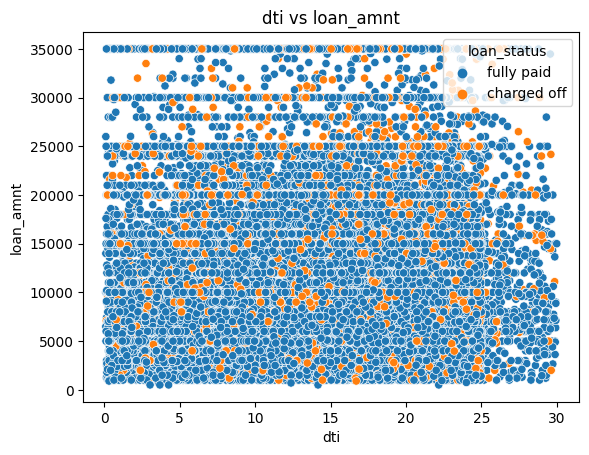

In [0]:
# Creating scatter plots for the numeric columns with loan_status as hue to see if a combination of two features can explain the loan_status
a='dti'
b='loan_amnt'
sns.scatterplot(data=loanData[loanData['loan_status'].isin(['charged off','fully paid'])], x=a, y=b, hue='loan_status')
plt.title(f'{a} vs {b}')
plt.show()

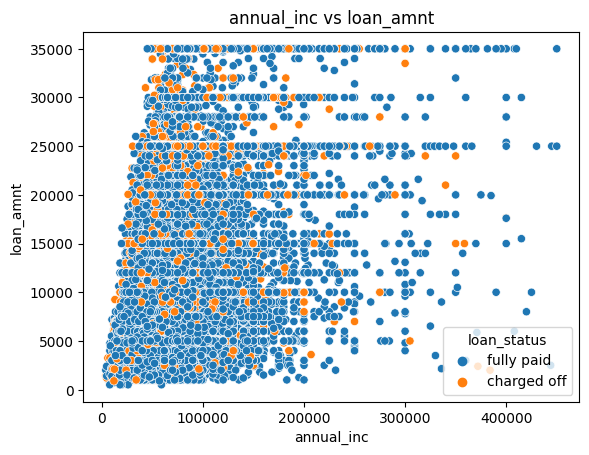

In [0]:
# Creating scatter plots for the numeric columns with loan_status as hue to see if a combination of two features can explain the loan_status
a='annual_inc'
b='loan_amnt'
sns.scatterplot(data=loanData[loanData['loan_status'].isin(['charged off','fully paid'])], x=a, y=b, hue='loan_status')
plt.title(f'{a} vs {b}')
plt.show()

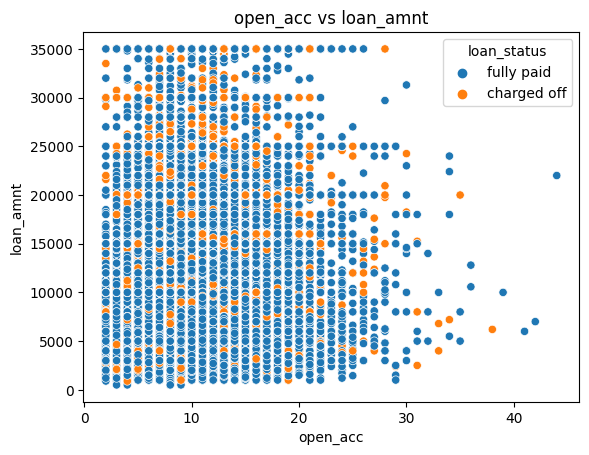

In [0]:
# Creating scatter plots for the numeric columns with loan_status as hue to see if a combination of two features can explain the loan_status
a='open_acc'
b='loan_amnt'
sns.scatterplot(data=loanData[loanData['loan_status'].isin(['charged off','fully paid'])], x=a, y=b, hue='loan_status')
plt.title(f'{a} vs {b}')
plt.show()

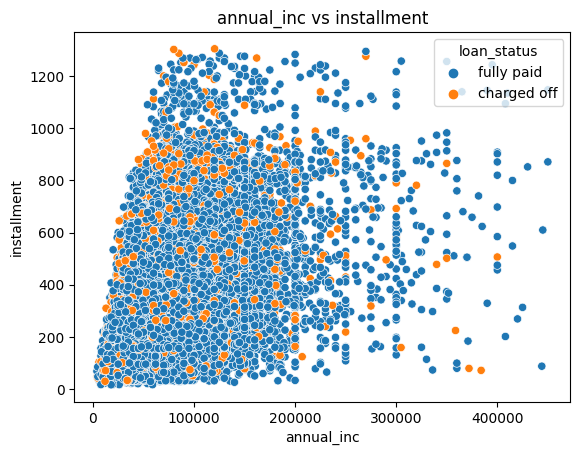

In [0]:
# Creating scatter plots for the numeric columns with loan_status as hue to see if a combination of two features can explain the loan_status
a='annual_inc'
b='installment'
sns.scatterplot(data=loanData[loanData['loan_status'].isin(['charged off','fully paid'])], x=a, y=b, hue='loan_status')
plt.title(f'{a} vs {b}')
plt.show()

### Bivariate analysis for the categorical features

In [0]:
# Bivariate analysis for the categorial columns. Checking the effect of 'term' on other features
loanData_cols=loanData[['loan_status','term','home_ownership','purpose','verification_status']] 

loanData_pivot=(loanData_cols.set_index('term').stack()
 .groupby(level=[0,1])
 .value_counts(normalize=True)
 .unstack(level=[1,2])
 .fillna(0)
 .sort_index(axis=1))

loanData_pivot

home_ownership            ... verification_status          
                mortgage      none  ...     source verified  verified
term                                ...                              
36 months       0.413146  0.000105  ...            0.241757  0.264112
60 months       0.534039  0.000000  ...            0.283753  0.490179

[2 rows x 25 columns]

In [0]:
# Bivariate analysis for the categorial columns. Checking the effect of 'home_ownership' on other features
loanData_cols=loanData[['loan_status','term','home_ownership','purpose','verification_status']] 

loanData_pivot=(loanData_cols.set_index('home_ownership').stack()
 .groupby(level=[0,1])
 .value_counts(normalize=True)
 .unstack(level=[1,2])
 .fillna(0)
 .sort_index(axis=1))

loanData_pivot

loan_status            ... verification_status          
               charged off   current  ...     source verified  verified
home_ownership                        ...                              
mortgage          0.129530  0.036416  ...            0.226332  0.378853
none              0.000000  0.000000  ...            0.000000  0.000000
other             0.191011  0.000000  ...            0.112360  0.393258
own               0.142523  0.027768  ...            0.252927  0.266644
rent              0.145444  0.022538  ...            0.278889  0.283645

[5 rows x 22 columns]

### Bivariate Analysis Findings:
### Numeric Features:
- As seen in the graph of dti vs loan_amount, we can see that a combination of higher values of both leads to more loan defaults. Hence a person with higher dti(debt to income ratio) in the range of 15+ must not be given higher value loans(above 2lakhs).
- As seen in the graph of annual_inc vs loan_amount, we can see that a combination of high loan_amtand low annual_inc, leads to higher loan defaults. . Hence a person with low annual_income(less than 1lakh) must not be given higher value loans(2 lakh+).
- As seen in the graph of open_acc vs loan_amount, we can see that a combination of high loan_amt(20k +) and open_acc range of 7-20,leads to higher loan defaults. 
- As seen in the graph installment vs annual_inc, we can see that a combination of low annual_inc(less that 1.3 LPA) and higher installment(800 -1000) leads to higher defaults. Hence a person low annual_income must not be given loans with higher installments.

- Some variables with greater that 80pc correlation with each other are:
          -     ('total_rec_int', 'total_pymnt_inv')
          -     ('total_pymnt_inv', 'installment')
          -     ('pub_rec_bankruptcies', 'pub_rec')
          -     ('mths_since_last_record', 'pub_rec')
          -     ('funded_amnt', 'installment')

### Categorical Features
- '36 months' loans have a higher chance of getting fully paid off as compared to '60 months' term loans
- '60 months' loans have a higher percentage of 'verified status' loans as compared to '36 months' term loans
- No variables have a noteble negative correlation
  
    

## Consolidated findings.

**In-case we do-not have the loan history of the loan applicant:**
- **dti** : A person with higher dti (debt to income ratio) in the range of 15+ must not be given higher value loans(above 2lakhs)
- **annual_income** : A person with low annual_income(less than 1lakh) must not be given higher value loans(2 lakh+)
- **term** : '36 months' loans have a higher chance of getting fully paid off as compared to '60 months' term loans
- **int_rate** : Higher interest rates(11.5% and above) are more difficult to be paid off as compared to lower interest rates(6% to 12%)
- **installment** : A person low annual_income(less that 1.3 LPA)  must not be given loans with higher instalments(800 +)

**In-case we have the loan history of the applicant, we can also use the below findings in addition to the above ones:**
- **"inq_last_6mths"** : Defaulters have higher number of inquiries 1-5 in the last 6 months whereas non-defaulters have mostly 0 or 1 inquiry. 
- **"recoveries"** : Post charge off gross recovery is much higher in the range of 100 to 16k for defaulters whereas it is almost 0 for non-defaulters. 
- **"total_rec_prncp"** : Principal received to date for the loan defaulters is much less as compared to the non-defaulters. For defaulters it lies in the range of 1k to 5k whereas it lies in the range 5k to 14k for non-defaulters.
- **“open_acc”**: A person with higher open_acc(The number of open credit lines in the borrower's credit file) in the range of 7-20 must not be given higher value loans(2.5 lakh +)
